In [7]:
import qiime2 as q2
from qiime2.plugins.emperor.actions import biplot
from qiime2.plugins.gemelli.actions import (joint_rpca, filter_ordination, feature_correlation_table)
from qiime2.plugins.longitudinal.actions import volatility
from qiime2.plugins.diversity.visualizers import beta_group_significance

In [205]:
!qiime --version

q2cli version 2023.5.1
Run `qiime info` for more version details.


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Microbiome Filter

In [1]:
!qiime feature-table filter-samples \
    --i-table ../data/Microbiome/longIHC_gg2filt_feces_table.qza \
    --m-metadata-file ../data/Microbiome/longIHC_metadata_cleaned.txt \
    --p-where '[host_age] IN (19, 19.5, 20)' \
    --p-exclude-ids True \
    --o-filtered-table ../data/Microbiome/longIHC_gg2filt_feces_endTPs_table.qza

Saved FeatureTable[Frequency] to: ../data/Microbiome/longIHC_gg2filt_feces_endTPs_table.qza


In [9]:
!qiime feature-table filter-samples \
    --i-table ../data/Microbiome/longIHC_gg2filt_HFDonly_table.qza \
    --m-metadata-file ../data/Microbiome/longIHC_metadata_cleaned.txt \
    --p-where '[host_age] IN (19, 19.5, 20)' \
    --p-exclude-ids True \
    --o-filtered-table ../data/Microbiome/longIHC_gg2filt_HFDonly_endTPs_table.qza

Saved FeatureTable[Frequency] to: ../data/Microbiome/longIHC_gg2filt_HFDonly_endTPs_table.qza


In [3]:
!qiime feature-table filter-samples \
    --i-table ../data/Microbiome/longIHC_gg2filt_AirOnly_table.qza \
    --m-metadata-file ../data/Microbiome/longIHC_metadata_cleaned.txt \
    --p-where '[host_age] IN (19, 19.5, 20)' \
    --p-exclude-ids True \
    --o-filtered-table ../data/Microbiome/longIHC_gg2filt_AirOnly_endTPs_table.qza

Saved FeatureTable[Frequency] to: ../data/Microbiome/longIHC_gg2filt_AirOnly_endTPs_table.qza


#### Metabolome Filter

In [17]:
!qiime feature-table filter-samples \
    --i-table ../data/Metabolome/jointRPCA_rawcounts_all.qza \
    --m-metadata-file ../data/Microbiome/longIHC_metadata_cleaned.txt \
    --p-where '[host_age] IN (19, 19.5, 20)' \
    --p-exclude-ids True \
    --o-filtered-table ../data/Metabolome/jointRPCA_rawcounts_all_endTPs_table.qza

Saved FeatureTable[Frequency] to: ../data/Metabolome/jointRPCA_rawcounts_all_endTPs_table.qza


In [18]:
!qiime feature-table filter-samples \
    --i-table ../data/Metabolome/jointRPCA_rawcounts_HFD_noblanks_nodeadmice.qza \
    --m-metadata-file ../data/Microbiome/longIHC_metadata_cleaned.txt \
    --p-where '[host_age] IN (19, 19.5, 20)' \
    --p-exclude-ids True \
    --o-filtered-table ../data/Metabolome/jointRPCA_rawcounts_HFDonly_filt_endTPs.qza

Saved FeatureTable[Frequency] to: ../data/Metabolome/jointRPCA_rawcounts_HFDonly_filt_endTPs.qza


In [19]:
!qiime feature-table filter-samples \
    --i-table ../data/Metabolome/jointRPCA_rawcounts_Air_noblanks_nodeadmice.qza \
    --m-metadata-file ../data/Microbiome/longIHC_metadata_cleaned.txt \
    --p-where '[host_age] IN (19, 19.5, 20)' \
    --p-exclude-ids True \
    --o-filtered-table ../data/Metabolome/jointRPCA_rawcounts_Aironly_filt_endTPs.qza

Saved FeatureTable[Frequency] to: ../data/Metabolome/jointRPCA_rawcounts_Aironly_filt_endTPs.qza


#### Import Tables

In [20]:
# import tables
metab_all = q2.Artifact.load('../data/Metabolome/jointRPCA_rawcounts_all_endTPs_table.qza')
metab_HFD = q2.Artifact.load('../data/Metabolome/jointRPCA_rawcounts_HFDonly_filt_endTPs.qza')
metab_Air = q2.Artifact.load('../data/Metabolome/jointRPCA_rawcounts_Aironly_filt_endTPs.qza')

micro_ASV = q2.Artifact.load('../data/Microbiome/longIHC_gg2filt_feces_endTPs_table.qza')
micro_HFD = q2.Artifact.load('../data/Microbiome/longIHC_gg2filt_HFDonly_endTPs_table.qza')
micro_Air = q2.Artifact.load('../data/Microbiome/longIHC_gg2filt_AirOnly_endTPs_table.qza')

# import metadata
metadata = q2.Metadata.load('../data/Microbiome/longIHC_metadata_cleaned.txt')

# All

### RPCA (all)

In [21]:
!qiime gemelli rpca \
    --i-table ../data/Metabolome/jointRPCA_rawcounts_all_endTPs_table.qza \
    --p-min-sample-count 500 \
    --o-biplot ../data/Metabolome/RPCA_rawcounts_all_ordination.qza \
    --o-distance-matrix ../data/Metabolome/RPCA_rawcounts_endTPs_dm.qza

Saved PCoAResults % Properties('biplot') to: ../data/Metabolome/RPCA_rawcounts_all_ordination.qza
Saved DistanceMatrix to: ../data/Metabolome/RPCA_rawcounts_endTPs_dm.qza


In [22]:
!qiime emperor biplot \
    --i-biplot ../data/Metabolome/RPCA_rawcounts_all_ordination.qza \
    --m-sample-metadata-file ../data/Microbiome/longIHC_metadata_cleaned.txt \
    --p-number-of-features 10 \
    --o-visualization ../data/Metabolome/RPCA_rawcounts_endTPs_biplot.qzv

Saved Visualization to: ../data/Metabolome/RPCA_rawcounts_endTPs_biplot.qzv


In [23]:
!qiime diversity beta-group-significance \
    --i-distance-matrix ../data/Metabolome/RPCA_rawcounts_endTPs_dm.qza \
    --m-metadata-file ../data/Microbiome/longIHC_metadata_cleaned.txt \
    --m-metadata-column diet_exp \
    --p-method permanova \
    --p-pairwise True \
    --o-visualization ../data/Metabolome/RPCA_endTPs_dietexp_significance.qzv

Saved Visualization to: ../data/Metabolome/RPCA_endTPs_dietexp_significance.qzv


In [24]:
!qiime qurro loading-plot \
    --i-ranks ../data/Metabolome/RPCA_rawcounts_all_ordination.qza \
    --i-table ../data/Metabolome/jointRPCA_rawcounts_all.qza \
    --m-sample-metadata-file ../data/Microbiome/longIHC_metadata_cleaned.txt \
    --o-visualization ../data/Metabolome/RPCA_endTPs_qurro_plot.qzv
#RPCA ranks do not include TP1/host_age 10, but qurro log ratio plots do

Saved Visualization to: ../data/Metabolome/RPCA_endTPs_qurro_plot.qzv


### jointRPCA (all)

In [25]:
# run joint RPCA
jrpca_results = joint_rpca([metab_all, micro_ASV],
                           sample_metadata=metadata,
                           min_feature_frequency=5,
                           max_iterations=3)
jrpca_results.biplot.save('../data/Multiomics/micro-metab_endTPs_joint_ordination.qza')
jrpca_results.distance_matrix.save('../data/Multiomics/micro-metab_endTPs_distance_matrix.qza')
jrpca_results.cross_validation_error.save('../data/Multiomics/micro-metab_endTPs_cross_validation_error.qza')

jrpca_results

/Users/callaband/miniforge3/envs/qiime2-2023.5-gemelli/lib/python3.8/site-packages/gemelli/rpca.py:719: RuntimeWarning: Removing 498 sample(s) that do not overlap in tables.
  warnings.warn('Removing %i sample(s) that do not overlap in tables.'


Results (name = value)
------------------------------------------------------------------------------------------------------------------
biplot                 = <artifact: PCoAResults % Properties('biplot') uuid: 3fcc04e6-2cd8-44bd-98ee-0135fe081799>
distance_matrix        = <artifact: DistanceMatrix uuid: 24584840-3a86-4147-964c-a280b2b18cdf>
cross_validation_error = <artifact: SampleData[CrossValidationResults] uuid: 454db545-2785-4da4-b93f-4be85ffa7a06>

In [26]:
!qiime longitudinal volatility \
    --m-metadata-file ../data/Multiomics/micro-metab_endTPs_cross_validation_error.qza \
    --p-state-column 'iteration' \
    --o-visualization ../data/Multiomics/micro-metab_endTPs_volatility_plot.qzv

Saved Visualization to: ../data/Multiomics/micro-metab_endTPs_volatility_plot.qzv


In [27]:
!qiime emperor biplot \
    --i-biplot ../data/Multiomics/micro-metab_endTPs_joint_ordination.qza \
    --m-sample-metadata-file ../data/Microbiome/longIHC_metadata_cleaned.txt \
    --p-number-of-features 20 \
    --o-visualization ../data/Multiomics/micro-metab_endTPs_emperor-biplot.qzv

Saved Visualization to: ../data/Multiomics/micro-metab_endTPs_emperor-biplot.qzv


In [33]:
!qiime diversity beta-group-significance \
    --i-distance-matrix ../data/Multiomics/micro-metab_endTPs_distance_matrix.qza \
    --m-metadata-file ../data/Microbiome/longIHC_metadata_cleaned.txt \
    --m-metadata-column 'diet_exp'\
    --p-pairwise True \
    --o-visualization ../data/Multiomics/micro-metab_endTPs_jointRPCA_bsig_diet-exp.qzv

Saved Visualization to: ../data/Multiomics/micro-metab_endTPs_jointRPCA_bsig_diet-exp.qzv


In [29]:
!qiime gemelli feature-correlation-table \
    --i-ordination ../data/Multiomics/micro-metab_endTPs_joint_ordination.qza \
    --o-correlation-table ../data/Multiomics/micro-metab_endTPs_correlation_table.qza

Saved FeatureData[OrdinationCorrelation] to: ../data/Multiomics/micro-metab_endTPs_correlation_table.qza


In [30]:
!qiime tools export \
    --input-path ../data/Multiomics/micro-metab_endTPs_correlation_table.qza \
    --output-path ../data/Multiomics/micro-metab_endTPs_correlation_table

Exported ../data/Multiomics/micro-metab_endTPs_correlation_table.qza as CorrelationDirectoryFormat to directory ../data/Multiomics/micro-metab_endTPs_correlation_table


### Metabolites of Interest

In [35]:
metab_list = pd.read_csv('../data/Metabolome/sz_newlist_SupplementaryTable3.csv', index_col=0)
metab_list.head()
# All possible PLS DA metabs of interest

VIP_HFHC Group_Contribution_Diet  VIP_Air Group_Contribution_Air  \
Feature_ID                                                                     
29881          1.850            Regular chow    2.857                    AIR   
33139          1.869           High Fat Diet    2.648                    IHC   
32897          1.751           High Fat Diet    2.734                    IHC   
30165          1.814            Regular chow    2.582                    AIR   
32840          1.735           High Fat Diet    2.638                    IHC   

                  mz     RT  Correlation_ID         Spectrum_ID  \
Feature_ID                                                        
29881       279.2321  5.205            24.0                 NaN   
33139       370.3320  5.711           414.0  CCMSLIB00012717623   
32897       357.3191  5.652           294.0                 NaN   
30165       299.2584  5.249             NaN                 NaN   
32840       356.3167  5.646           294.0  CCMSLIB00012717521   

                                            Compound_Name Adduct Putative_BA  \
Feature_ID                                                                     
29881                                                 NaN    NaN         NaN   
33139       Candidate Leucine-C16:0 (delta mass:238.2298)    M+H         NaN   
32897                                                 NaN    NaN         NaN   
30165                                                 NaN    NaN         NaN   
32840        Candidate Valine-C16:0 (delta mass:238.2303)    M+H         NaN   

            VIP_Combined     Group_Combined                           Outcome  
Feature_ID                                                                     
29881              4.707   Regular chow_AIR  Decreased HFHC and Decresead IHC  
33139              4.518  High Fat Diet_IHC  Increased HFHC and Increased IHC  
32897              4.484  High Fat Diet_IHC  Increased HFHC and Increased IHC  
30165              4.396   Regular chow_AIR  Decreased HFHC and Decresead IHC  
32840              4.373  High Fat Diet_IHC  Increased HFHC and Increased IHC

In [36]:
metab_vip_lists = list(metab_list.index.values)
len(metab_vip_lists)

441

In [37]:
metab_list_named = metab_list.dropna(subset='Compound_Name')
metab_list_named.head()

VIP_HFHC Group_Contribution_Diet  VIP_Air Group_Contribution_Air  \
Feature_ID                                                                     
33139          1.869           High Fat Diet    2.648                    IHC   
32840          1.735           High Fat Diet    2.638                    IHC   
29177          1.537           High Fat Diet    2.756                    IHC   
28764          1.719           High Fat Diet    2.534                    IHC   
30197          1.640            Regular chow    2.600                    AIR   

                  mz     RT  Correlation_ID         Spectrum_ID  \
Feature_ID                                                        
33139       370.3320  5.711           414.0  CCMSLIB00012717623   
32840       356.3167  5.646           294.0  CCMSLIB00012717521   
29177       544.3417  5.026           145.0  CCMSLIB00010099317   
28764       494.3242  4.929             NaN  CCMSLIB00010055762   
30197       263.2373  5.245            26.0  CCMSLIB00003136115   

                                                Compound_Name   Adduct  \
Feature_ID                                                               
33139           Candidate Leucine-C16:0 (delta mass:238.2298)      M+H   
32840            Candidate Valine-C16:0 (delta mass:238.2303)      M+H   
29177                       PC(0:0/20:4); [M+H]+ C28H51N1O7P1      M+H   
28764                       PC(16:1/0:0); [M+H]+ C24H49N1O7P1      M+H   
30197       Spectral Match to Conjugated linoleic Acid (10...  M+H-H2O   

           Putative_BA  VIP_Combined     Group_Combined  \
Feature_ID                                                
33139              NaN         4.518  High Fat Diet_IHC   
32840              NaN         4.373  High Fat Diet_IHC   
29177              NaN         4.293  High Fat Diet_IHC   
28764              NaN         4.253  High Fat Diet_IHC   
30197              NaN         4.241   Regular chow_AIR   

                                     Outcome  
Feature_ID                                    
33139       Increased HFHC and Increased IHC  
32840       Increased HFHC and Increased IHC  
29177       Increased HFHC and Increased IHC  
28764       Increased HFHC and Increased IHC  
30197       Decreased HFHC and Decresead IHC

In [38]:
metab_list_named.shape

(141, 14)

### ASVs of interest

In [39]:
micro_list_temptedAx1 = pd.read_csv('../data/Microbiome/lr-metrics/tempted/longIHC_tempted_topbot10num_Axis1_lr_features_named.tsv', 
                                    sep='\t', index_col=0) #Axis 1 separates based on exposure
micro_list_temptedAx2 = pd.read_csv('../data/Microbiome/lr-metrics/tempted/longIHC_tempted_topbot10num_Axis2_lr_features_named.tsv', 
                                    sep='\t', index_col=0) #Axis 2 separates based on diet
taxonomy = pd.read_csv('../data/Microbiome/longIHC_gg2filt_taxonomy/taxonomy_mod.txt', sep='\t', index_col=0)
taxonomy2 = taxonomy[taxonomy['Taxon'].str.contains("Muribaculaceae|Akkermansiaceae")].copy()
taxonomy2.shape

(680, 1)

In [40]:
ASV_interest = list(micro_list_temptedAx1.index.values)+list(micro_list_temptedAx2.index.values)+list(taxonomy2.index.values)
len(set(ASV_interest))

712

In [41]:
ASV_diet = list(micro_list_temptedAx2.index.values)+list(taxonomy2.index.values)
len(set(ASV_diet))

699

In [42]:
ASV_exp = list(micro_list_temptedAx1.index.values)+list(taxonomy2.index.values)
len(set(ASV_exp))

696

### Tables

In [43]:
all_corr_table = pd.read_csv('../data/Multiomics/micro-metab_endTPs_correlation_table/Correlation.tsv', sep='\t', index_col=0)
all_corr_table.head()

/var/folders/3b/vgfxgx4j1hn384yg_whm02qc0000gp/T/ipykernel_61239/1394038734.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  all_corr_table = pd.read_csv('../data/Multiomics/micro-metab_endTPs_correlation_table/Correlation.tsv', sep='\t', index_col=0)


2237      1680      2970      6894     13421      1859  \
featureid                                                               
2237       1.000000  0.629909 -0.134836 -0.890268 -0.971037  0.943743   
1680       0.629909  1.000000 -0.242301 -0.893541 -0.617927  0.672990   
2970      -0.134836 -0.242301  1.000000  0.356685 -0.099047  0.157646   
6894      -0.890268 -0.893541  0.356685  1.000000  0.831049 -0.834860   
13421     -0.971037 -0.617927 -0.099047  0.831049  1.000000 -0.992408   

               1315     12265       572      1061  ...  \
featureid                                          ...   
2237       0.855098 -0.409875  0.577485  0.887500  ...   
1680       0.325699 -0.966502  0.997785  0.871100  ...   
2970       0.367067  0.224192 -0.253390  0.017772  ...   
6894      -0.575826  0.753105 -0.865476 -0.927398  ...   
13421     -0.933201  0.409262 -0.564850 -0.918915  ...   

           TACGTAGGTGGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGTAGGCGGGAATGCAAGTTGAATGTTTAAACTATGGGCTCAACCCATAGTCGCGTTCAAAACTGCATTTCTTGAGTGGAGTAGAGGCAGGCGGAATTCCTAGT  \
featureid                                                                                                                                                           
2237                                               -0.782619                                                                                                        
1680                                               -0.030022                                                                                                        
2970                                                0.158786                                                                                                        
6894                                                0.469077                                                                                                        
13421                                               0.712299                                                                                                        

           TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGGCCAGCAAGTCTGATGTGAAAACCCGGGGCCCAACCCCGGGAGTGCATTGGAAACTGCGGGCCTGGAGTGCCGGAGAGGTAAGCGGAATTCCTAG  \
featureid                                                                                                                                                           
2237                                               -0.045040                                                                                                        
1680                                               -0.799509                                                                                                        
2970                                                0.100276                                                                                                        
6894                                                0.448446                                                                                                        
13421                                               0.078077                                                                                                        

           TACGTAGGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGCGTGTAGGCGGGCCTGCAAGTCAGAAGTGAAATCTGGGGGCTTAACCCCCAAACTGCTTTTGAAACTGTGGGTCTTGAGTGATGGAGAGGCAGGCGGAATTCCCAG  \
featureid                                                                                                                                                           
2237                                               -0.237446                                                                                                        
1680                                               -0.897415                                                                                                        
2970                                                0.351575                                                                

In [46]:
all_corr_tablew = all_corr_table.filter(items=list(metab_list.index.values), axis=0)
all_corr_tablez = all_corr_tablew.filter(items=list(set(ASV_interest)), axis=1)
all_corr_tablez.shape

(440, 38)

In [47]:
all_corr_tablez.to_csv('../data/Metabolome/szlist-all_allASVinterest_jointRPCA.csv')

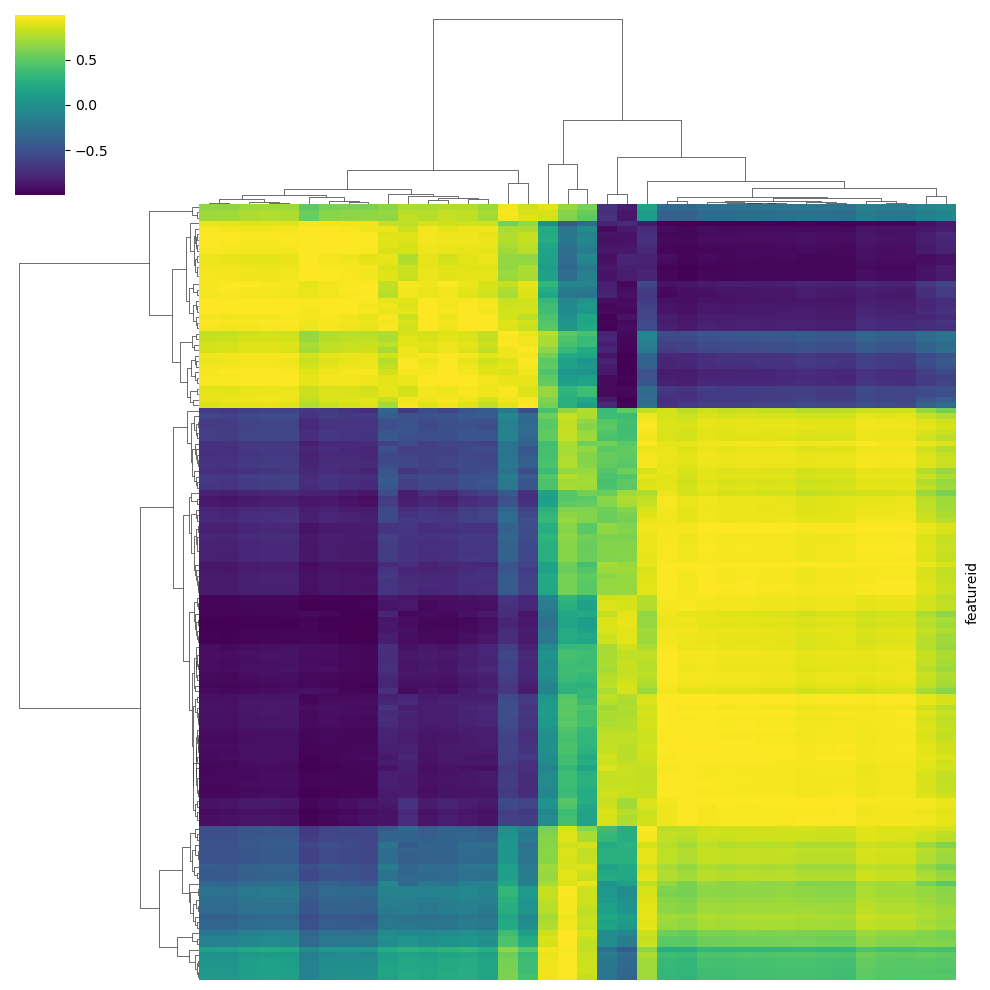

In [83]:
#everything of interest
g = sns.clustermap(data=all_corr_tablez, 
                   yticklabels=False, xticklabels=False, cmap='viridis')
plt.savefig('../figures/jointRPCA_endTPs_szlist-all_clustermap.png')

In [50]:
all_corr_tablew = all_corr_table.filter(items=list(metab_list_named.index.values), axis=0)
all_corr_table_named = all_corr_tablew.filter(items=list(set(ASV_interest)), axis=1)
all_corr_table_named.shape

(141, 38)

In [51]:
all_corr_table_named.to_csv('../data/Metabolome/szlist-named_allASVinterest_jointRPCA.csv')

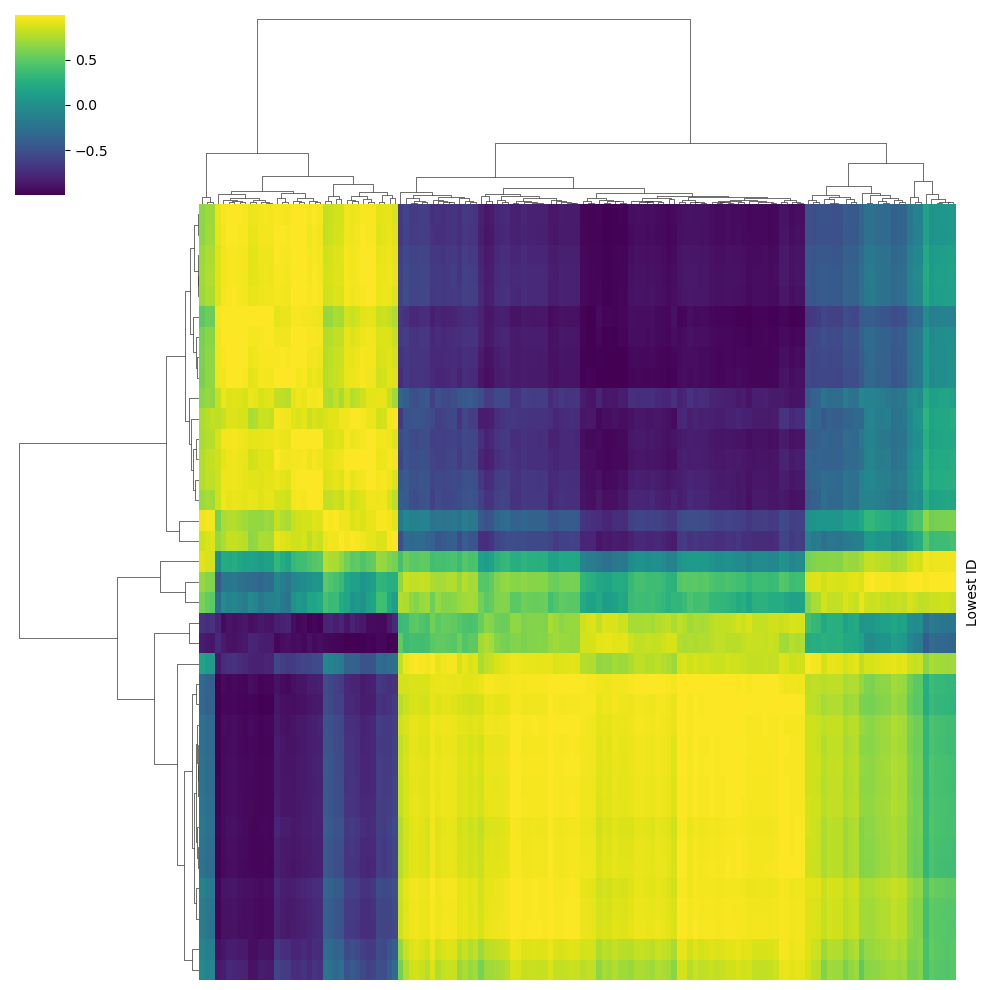

In [84]:
#everything of interest
g = sns.clustermap(data=all_corr_table_named,
                   yticklabels=False, xticklabels=False, cmap='viridis')
plt.savefig('../figures/jointRPCA_endTPs_szlist-named_clustermap.png')

In [53]:
all_corr_table_named.shape

(141, 38)

In [55]:
all_corr_table_named.head()

TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGCAGCCGGGTTTATAAGTCAGATGTGAAATCCCGCGGCTCAACCGCGGAACTGCATTTGAAACTGTAGATCTTGAGTACTGGAGAGGCAGGCGGAATTCCTAG  \
featureid                                                                                                                                                           
33139                                              -0.900237                                                                                                        
32840                                              -0.765766                                                                                                        
29177                                              -0.816997                                                                                                        
28764                                              -0.749621                                                                                                        
30197                                               0.925888                                                                                                        

           TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGCAGGCGGAAGCGCAAGTCAGCGGTAAAATTGAGAGGCTCAACCTCTTCCCGCCGTTGAAACTGCGTTTCTTGAGTGGGCGAGAAGTACGCGGAATGCGTGGT  \
featureid                                                                                                                                                           
33139                                              -0.673001                                                                                                        
32840                                              -0.498808                                                                                                        
29177                                              -0.607818                                                                                                        
28764                                              -0.491194                                                                                                        
30197                                               0.938912                                                                                                        

           TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTGCGTAGGCTGTTTCGTAAGTCGTGTGTGAAAGGCGCGGGCTCAACCCGCGGACGGCACATGATACTGCGAGACTAGAGTAATGGAGGGGGAACCGGAATTCTCGG  \
featureid                                                                                                                                                           
33139                                               0.644866                                                                                                        
32840                                               0.813884                                                                                                        
29177                                               0.740445                                                                                                        
28764                                               0.824165                                                                                                        
30197                                               0.093255                                                                                                        

           TACATAGGGGGCAAGCGTTATCCGGAATTATTGGGTGTAAAGGGTGCGTAGACGGAAGAACAAGTTGGTTGTGAAATCCCTCGGCTCAACTGAGGAACTGCAACCAAAACTATTCTCCTTGAGTGTCGGAGAGGAAAGTGGAATTCCTAG  \
featureid                                                                                                                                                           
33139                                              -0.690239                                                                                                        
32840                                           

In [57]:
taxonomy = pd.read_csv('../data/Microbiome/longIHC_gg2filt_taxonomy/taxonomy.tsv', sep='\t', usecols=[0,1], index_col=0)
taxonomy.head()

Taxon
Feature ID                                                                                           
TACGTAGGGGGCAAGCGTTATCCGGAATTACTGGGTGTAAAGGGAGA...  d__Bacteria; p__Firmicutes_A; c__Clostridia_25...
TACGTAGGGCGCGAGCGTTATCCGGAATTATTGGGTGTAAAGGGTGC...  d__Bacteria; p__Firmicutes_A; c__Clostridia_25...
TACGTATGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGC...  d__Bacteria; p__Firmicutes_A; c__Clostridia_25...
TACGTAGGGGGCAAGCGTTATCCGGAATGACTGGGCGTAAAGGGTGC...  d__Bacteria; p__Firmicutes_A; c__Clostridia_25...
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGT...  d__Bacteria; p__Firmicutes_A; c__Clostridia_25...

In [58]:
all_corr_table_named = pd.merge(all_corr_table_named.T, taxonomy, left_index=True, right_index=True)
all_corr_table_named['Lowest ID'] = all_corr_table_named['Taxon'].str.rsplit('f__').str[1]
all_corr_table_named.set_index('Lowest ID', inplace=True)
all_corr_table_named.drop(columns=['Taxon'], inplace=True)
all_corr_table_named.head()

33139     32840  \
Lowest ID                                                                
Oscillospiraceae_88309; g__; s__                   -0.900237 -0.765766   
Muribaculaceae; g__Duncaniella; s__Duncaniella ... -0.673001 -0.498808   
Akkermansiaceae; g__Akkermansia; s__Akkermansia...  0.644866  0.813884   
CAG-508; g__UMGS1994; s__UMGS1994 sp900553945      -0.690239 -0.507274   
Coprobacillaceae; g__Fimiplasma; s__Fimiplasma ...  0.989371  0.924180   

                                                       29177     28764  \
Lowest ID                                                                
Oscillospiraceae_88309; g__; s__                   -0.816997 -0.749621   
Muribaculaceae; g__Duncaniella; s__Duncaniella ... -0.607818 -0.491194   
Akkermansiaceae; g__Akkermansia; s__Akkermansia...  0.740445  0.824165   
CAG-508; g__UMGS1994; s__UMGS1994 sp900553945      -0.557870 -0.482598   
Coprobacillaceae; g__Fimiplasma; s__Fimiplasma ...  0.950781  0.914437   

                                                       30197     20406  \
Lowest ID                                                                
Oscillospiraceae_88309; g__; s__                    0.925888 -0.411840   
Muribaculaceae; g__Duncaniella; s__Duncaniella ...  0.938912 -0.116649   
Akkermansiaceae; g__Akkermansia; s__Akkermansia...  0.093255  0.983321   
CAG-508; g__UMGS1994; s__UMGS1994 sp900553945       0.917612 -0.108690   
Coprobacillaceae; g__Fimiplasma; s__Fimiplasma ... -0.786276  0.666851   

                                                       37131     24169  \
Lowest ID                                                                
Oscillospiraceae_88309; g__; s__                   -0.882349 -0.977746   
Muribaculaceae; g__Duncaniella; s__Duncaniella ... -0.707580 -0.857229   
Akkermansiaceae; g__Akkermansia; s__Akkermansia...  0.638933  0.374281   
CAG-508; g__UMGS1994; s__UMGS1994 sp900553945      -0.647326 -0.828366   
Coprobacillaceae; g__Fimiplasma; s__Fimiplasma ...  0.977544  0.977127   

                                                       20550     24528  ...  \
Lowest ID                                                               ...   
Oscillospiraceae_88309; g__; s__                   -0.345769 -0.882642  ...   
Muribaculaceae; g__Duncaniella; s__Duncaniella ... -0.069201 -0.714971  ...   
Akkermansiaceae; g__Akkermansia; s__Akkermansia...  0.988761  0.632858  ...   
CAG-508; g__UMGS1994; s__UMGS1994 sp900553945      -0.033122 -0.646490  ...   
Coprobacillaceae; g__Fimiplasma; s__Fimiplasma ...  0.612558  0.976529  ...   

                                                       28860     28871  \
Lowest ID                                                                
Oscillospiraceae_88309; g__; s__                   -0.534697 -0.109711   
Muribaculaceae; g__Duncaniella; s__Duncaniella ... -0.257827  0.199547   
Akkermansiaceae; g__Akkermansia; s__Akkermansia...  0.946749  0.987614   
CAG-508; g__UMGS1994; s__UMGS1994 sp900553945      -0.232359  0.173583   
Coprobacillaceae; g__Fimiplasma; s__Fimiplasma ...  0.764778  0.400195   

                                                       3405      2085   \
Lowest ID                                                                
Oscillospiraceae_88309; g__; s__                    0.732178  0.860516   
Muribaculaceae; g__Duncaniella; s__Duncaniella ...  0.954870  0.985026   
Akkermansiaceae; g__Akkermansia; s__Akkermansia...  0.350949  0.146920   
CAG-508; g__UMGS1994; s__UMGS1994 sp900553945       0.735386  0.818908   
Coprobacillaceae; g__Fimiplasma; s__Fimiplasma ... -0.550946 -0.722928   

                                                       24558     6986   \
Lowest ID                                                                
Oscillospiraceae_88309; g__; s__                   -0.992903  0.546337   
Muribaculaceae; g__Duncaniella; s__Duncaniella ... -0.769134  0.812973   
Akkermansiaceae; g__Akkermansia; s__Akkermansia...  0.367222  0.622576   
CAG-508; g__UMGS1

In [59]:
all_corr_table_mm_named = pd.merge(all_corr_table_named.T, metab_list_named[['Compound_Name']],
                                                     left_index=True, right_index=True)
all_corr_table_mm_named.set_index('Compound_Name', inplace=True)
all_corr_table_mm_named.head()

Oscillospiraceae_88309; g__; s__  \
Compound_Name                                                                          
Candidate Leucine-C16:0 (delta mass:238.2298)                              -0.900237   
Candidate Valine-C16:0 (delta mass:238.2303)                               -0.765766   
PC(0:0/20:4); [M+H]+ C28H51N1O7P1                                          -0.816997   
PC(16:1/0:0); [M+H]+ C24H49N1O7P1                                          -0.749621   
Spectral Match to Conjugated linoleic Acid (10E...                          0.925888   

                                                    Muribaculaceae; g__Duncaniella; s__Duncaniella muris  \
Compound_Name                                                                                              
Candidate Leucine-C16:0 (delta mass:238.2298)                                               -0.673001      
Candidate Valine-C16:0 (delta mass:238.2303)                                                -0.498808      
PC(0:0/20:4); [M+H]+ C28H51N1O7P1                                                           -0.607818      
PC(16:1/0:0); [M+H]+ C24H49N1O7P1                                                           -0.491194      
Spectral Match to Conjugated linoleic Acid (10E...                                           0.938912      

                                                    Akkermansiaceae; g__Akkermansia; s__Akkermansia muciniphila_D_776786  \
Compound_Name                                                                                                              
Candidate Leucine-C16:0 (delta mass:238.2298)                                                0.644866                      
Candidate Valine-C16:0 (delta mass:238.2303)                                                 0.813884                      
PC(0:0/20:4); [M+H]+ C28H51N1O7P1                                                            0.740445                      
PC(16:1/0:0); [M+H]+ C24H49N1O7P1                                                            0.824165                      
Spectral Match to Conjugated linoleic Acid (10E...                                           0.093255                      

                                                    CAG-508; g__UMGS1994; s__UMGS1994 sp900553945  \
Compound_Name                                                                                       
Candidate Leucine-C16:0 (delta mass:238.2298)                                           -0.690239   
Candidate Valine-C16:0 (delta mass:238.2303)                                            -0.507274   
PC(0:0/20:4); [M+H]+ C28H51N1O7P1                                                       -0.557870   
PC(16:1/0:0); [M+H]+ C24H49N1O7P1                                                       -0.482598   
Spectral Match to Conjugated linoleic Acid (10E...                                       0.917612   

                                                    Coprobacillaceae; g__Fimiplasma; s__Fimiplasma intestinipullorum  \
Compound_Name                                                                                                          
Candidate Leucine-C16:0 (delta mass:238.2298)                                                0.989371                  
Candidate Valine-C16:0 (delta mass:238.2303)                                                 0.924180                  
PC(0:0/20:4); [M+H]+ C28H51N1O7P1                                                            0.950781                  
PC(16:1/0:0); [M+H]+ C24H49N1O7P1                                                            0.914437                  
Spectral Match to Conjugated linoleic Acid (10E...                                          -0.786276                  

                                                    Muribaculaceae; g__UBA7173; s__  \
Compound_Name                                                                         
Candidate Leucine-C16:0 (delta mass:238.2298)                             -0.697250   

In [90]:
all_corr_table_mm_named.to_csv('../data/Multiomics/subset_filtered_jointRPCA_newtable.csv')

## Named Tables

In [235]:
#Simone Zuffa helped with shorter names
short_names = pd.read_csv('../data/Multiomics/sz_short_names.csv', index_col=0)
short_names.head()

Short_Name
Compound_Name                                                                                        
"(4R)-4-((3S,5S,7S,9S,10S,13R,14S,17R)-3,7-dihy...                    Dihydroxy-mono ketone bile acid
"(4R)-4-((3S,5S,7S,9S,10S,13R,14S,17R)-3,7-dihy...                    Dihydroxy-mono ketone bile acid
"(R)-4-((3R,5R,6R,8R,9S,10R,12S,13R,14S,17R)-3,...                          Trihydroxylated bile acid
"(R)-4-((3R,5R,8R,9S,10S,12S,13R,14S,17R)-3,12-...                          Dihydroxylated bile acid 
"Candidate Dihydroxylated bile acid (delta mass...  Candidate Dihydroxylated bile acid (delta -0.0...

In [236]:
jointRPCA_final = pd.read_csv('../data/Multiomics/subset_filtered_jointRPCA_newtable.csv', index_col=0)
jointRPCA_final.tail()

Oscillospiraceae_88309; g__; s__  \
Compound_Name                                                                          
Spectral Match to Val-Leu from NIST14                                       0.546337   
"Candidate Trihydroxylated bile acid (delta mas...                         -0.111396   
"Candidate Tetrahydroxylated bile acid (delta m...                         -0.833899   
Candidate Arginine-C18:0 (delta mass:266.2612)                             -0.944662   
Spectral Match to Leu-Glu from NIST14                                       0.495947   

                                                    Muribaculaceae; g__Duncaniella; s__Duncaniella muris  \
Compound_Name                                                                                              
Spectral Match to Val-Leu from NIST14                                                        0.812973      
"Candidate Trihydroxylated bile acid (delta mas...                                           0.226844      
"Candidate Tetrahydroxylated bile acid (delta m...                                          -0.549943      
Candidate Arginine-C18:0 (delta mass:266.2612)                                              -0.814586      
Spectral Match to Leu-Glu from NIST14                                                        0.743979      

                                                    Akkermansiaceae; g__Akkermansia; s__Akkermansia muciniphila_D_776786  \
Compound_Name                                                                                                              
Spectral Match to Val-Leu from NIST14                                                        0.622576                      
"Candidate Trihydroxylated bile acid (delta mas...                                           0.986437                      
"Candidate Tetrahydroxylated bile acid (delta m...                                           0.750957                      
Candidate Arginine-C18:0 (delta mass:266.2612)                                               0.486076                      
Spectral Match to Leu-Glu from NIST14                                                        0.690176                      

                                                    CAG-508; g__UMGS1994; s__UMGS1994 sp900553945  \
Compound_Name                                                                                       
Spectral Match to Val-Leu from NIST14                                                    0.657113   
"Candidate Trihydroxylated bile acid (delta mas...                                       0.155680   
"Candidate Tetrahydroxylated bile acid (delta m...                                      -0.609908   
Candidate Arginine-C18:0 (delta mass:266.2612)                                          -0.751499   
Spectral Match to Leu-Glu from NIST14                                                    0.649757   

                                                    Coprobacillaceae; g__Fimiplasma; s__Fimiplasma intestinipullorum  \
Compound_Name                                                                                                          
Spectral Match to Val-Leu from NIST14                                                       -0.298865                  
"Candidate Trihydroxylated bile acid (delta mas...                                           0.397970                  
"Candidate Tetrahydroxylated bile acid (delta m...                                           0.960762                  
Candidate Arginine-C18:0 (delta mass:266.2612)                                               0.985191                  
Spectral Match to Leu-Glu from NIST14                                                       -0.229107                  

                                                    Muribaculaceae; g__UBA7173; s__  \
Compound_Name                                                                         
Spectral Match to Val-Leu from NIST14                                      0.800833   

In [237]:
jointRPCA_final.shape

(141, 38)

In [238]:
jointRPCA_final2 = pd.merge(jointRPCA_final, short_names, how='outer', left_index=True, right_index=True)
jointRPCA_final2.dropna(subset=['Oscillospiraceae_88309; g__; s__'], inplace=True)
jointRPCA_final2['Short_Name'].isna().sum()

0

In [239]:
jointRPCA_final3 = jointRPCA_final2.reset_index()
jointRPCA_final3['Short_Name'].fillna(jointRPCA_final3.Compound_Name, inplace=True)
jointRPCA_final3['Short_Name'].isna().sum()

0

In [240]:
jointRPCA_final3.set_index('Short_Name', inplace=True)

In [241]:
jointRPCA_final3.drop(columns=['Compound_Name'], inplace=True)
jointRPCA_final3.head()

Oscillospiraceae_88309; g__; s__  \
Short_Name                                                                             
Dihydroxylated bile acid                                                   -0.470601   
Candidate Dihydroxylated bile acid (delta -22.0...                          0.993123   
Candidate Dihydroxylated bile acid (delta -37.0...                         -0.683410   
Candidate Dihydroxylated bile acid (delta -38.0...                         -0.480761   
Candidate Dihydroxylated bile acid (delta -38.0...                         -0.480761   

                                                    Muribaculaceae; g__Duncaniella; s__Duncaniella muris  \
Short_Name                                                                                                 
Dihydroxylated bile acid                                                                    -0.166229      
Candidate Dihydroxylated bile acid (delta -22.0...                                           0.840631      
Candidate Dihydroxylated bile acid (delta -37.0...                                          -0.668213      
Candidate Dihydroxylated bile acid (delta -38.0...                                          -0.153433      
Candidate Dihydroxylated bile acid (delta -38.0...                                          -0.153433      

                                                    Akkermansiaceae; g__Akkermansia; s__Akkermansia muciniphila_D_776786  \
Short_Name                                                                                                                 
Dihydroxylated bile acid                                                                     0.972230                      
Candidate Dihydroxylated bile acid (delta -22.0...                                          -0.339998                      
Candidate Dihydroxylated bile acid (delta -37.0...                                           0.666450                      
Candidate Dihydroxylated bile acid (delta -38.0...                                           0.972258                      
Candidate Dihydroxylated bile acid (delta -38.0...                                           0.972258                      

                                                    CAG-508; g__UMGS1994; s__UMGS1994 sp900553945  \
Short_Name                                                                                          
Dihydroxylated bile acid                                                                -0.174708   
Candidate Dihydroxylated bile acid (delta -22.0...                                       0.875913   
Candidate Dihydroxylated bile acid (delta -37.0...                                      -0.358454   
Candidate Dihydroxylated bile acid (delta -38.0...                                      -0.196868   
Candidate Dihydroxylated bile acid (delta -38.0...                                      -0.196868   

                                                    Coprobacillaceae; g__Fimiplasma; s__Fimiplasma intestinipullorum  \
Short_Name                                                                                                             
Dihydroxylated bile acid                                                                     0.713836                  
Candidate Dihydroxylated bile acid (delta -22.0...                                          -0.975284                  
Candidate Dihydroxylated bile acid (delta -37.0...                                           0.829700                  
Candidate Dihydroxylated bile acid (delta -38.0...                                           0.720188                  
Candidate Dihydroxylated bile acid (delta -38.0...                                           0.720188                  

                                                    Muribaculaceae; g__UBA7173; s__  \
Short_Name                                                                            
Dihydroxylated bile acid                                                  -0.133280   

In [242]:
jointRPCA_final3.drop_duplicates(inplace=True)
jointRPCA_final3.shape

(141, 38)

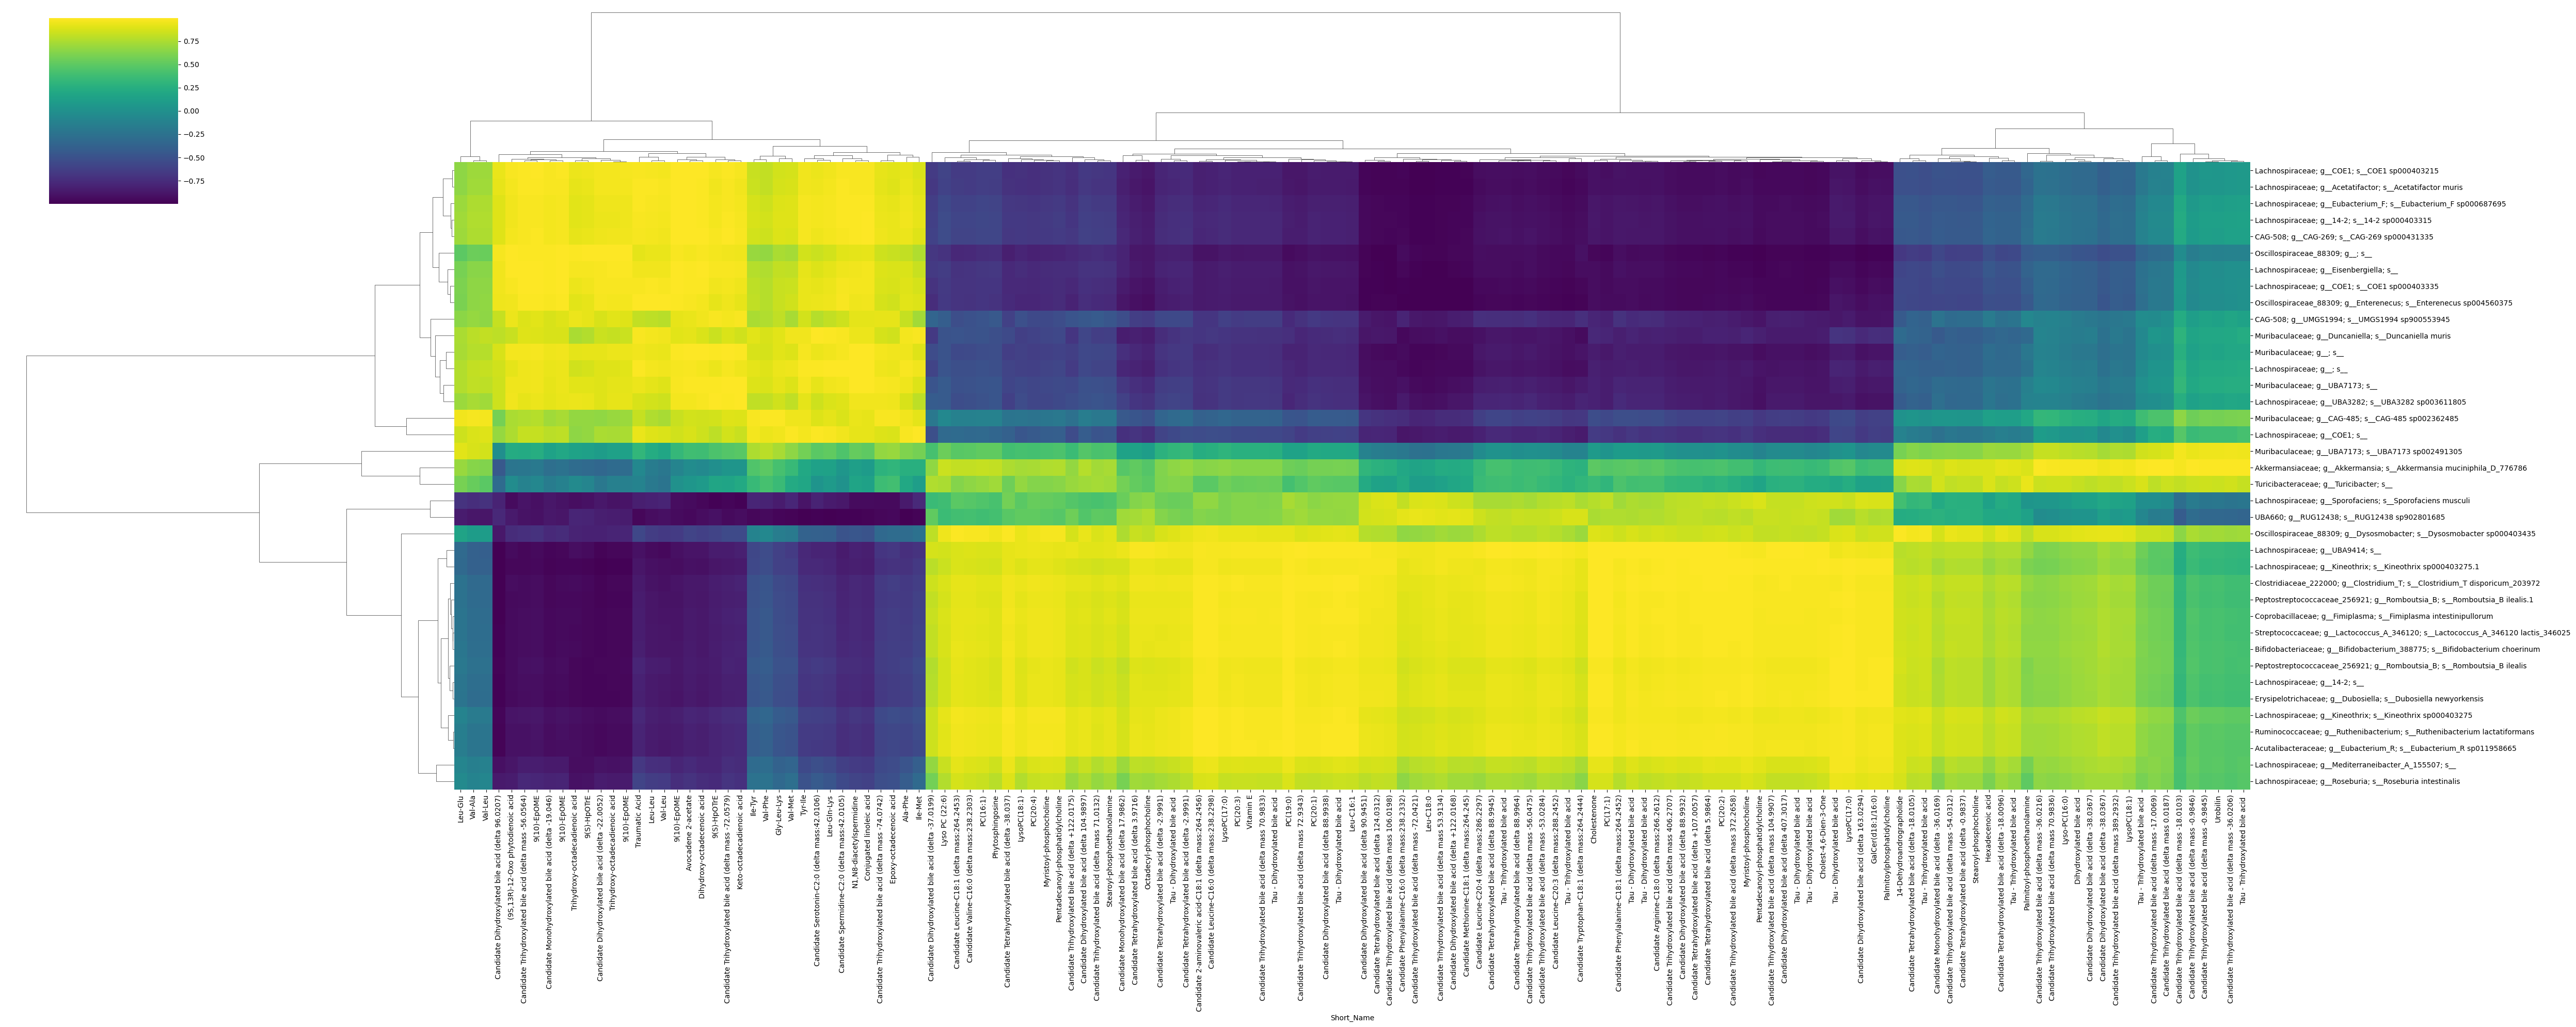

In [243]:
sns.clustermap(data=jointRPCA_final3.T, figsize=(50, 20), cmap='viridis', xticklabels=True)
new_rc_params = {'text.usetex': False, "svg.fonttype": 'none'}
plt.rcParams.update(new_rc_params)
plt.savefig('../figures/jointRPCA_micro-metab_endTPs_short-names.svg')
#plt.close() #do not show plot inline

In [244]:
main_fig = jointRPCA_final3.loc[:, jointRPCA_final3.columns.str.contains("Akkermansiaceae|Muribaculaceae", case=False)]
main_fig.head()

Muribaculaceae; g__Duncaniella; s__Duncaniella muris  \
Short_Name                                                                                                 
Dihydroxylated bile acid                                                                    -0.166229      
Candidate Dihydroxylated bile acid (delta -22.0...                                           0.840631      
Candidate Dihydroxylated bile acid (delta -37.0...                                          -0.668213      
Candidate Dihydroxylated bile acid (delta -38.0...                                          -0.153433      
Candidate Dihydroxylated bile acid (delta -38.0...                                          -0.257827      

                                                    Akkermansiaceae; g__Akkermansia; s__Akkermansia muciniphila_D_776786  \
Short_Name                                                                                                                 
Dihydroxylated bile acid                                                                     0.972230                      
Candidate Dihydroxylated bile acid (delta -22.0...                                          -0.339998                      
Candidate Dihydroxylated bile acid (delta -37.0...                                           0.666450                      
Candidate Dihydroxylated bile acid (delta -38.0...                                           0.972258                      
Candidate Dihydroxylated bile acid (delta -38.0...                                           0.946749                      

                                                    Muribaculaceae; g__UBA7173; s__  \
Short_Name                                                                            
Dihydroxylated bile acid                                                  -0.133280   
Candidate Dihydroxylated bile acid (delta -22.0...                         0.903578   
Candidate Dihydroxylated bile acid (delta -37.0...                        -0.481470   
Candidate Dihydroxylated bile acid (delta -38.0...                        -0.142005   
Candidate Dihydroxylated bile acid (delta -38.0...                        -0.210721   

                                                    Muribaculaceae; g__CAG-485; s__CAG-485 sp002362485  \
Short_Name                                                                                               
Dihydroxylated bile acid                                                                     0.254056    
Candidate Dihydroxylated bile acid (delta -22.0...                                           0.671386    
Candidate Dihydroxylated bile acid (delta -37.0...                                          -0.197617    
Candidate Dihydroxylated bile acid (delta -38.0...                                           0.249021    
Candidate Dihydroxylated bile acid (delta -38.0...                                           0.172738    

                                                    Muribaculaceae; g__; s__  \
Short_Name                                                                     
Dihydroxylated bile acid                                           -0.195471   
Candidate Dihydroxylated bile acid (delta -22.0...                  0.928948   
Candidate Dihydroxylated bile acid (delta -37.0...                 -0.543789   
Candidate Dihydroxylated bile acid (delta -38.0...                 -0.202343   
Candidate Dihydroxylated bile acid (delta -38.0...                 -0.273633   

                                                    Muribaculaceae; g__UBA7173; s__UBA7173 sp002491305  
Short_Name                                                                                              
Dihydroxylated bile acid                                                                     0.782047   
Candidate Dihydroxylated bile acid (delta -22.0...                                           0.095498   
Candidate Dihydroxylated bile acid (delta -37.0...                                          

In [245]:
main_fig.columns

Index(['Muribaculaceae; g__Duncaniella; s__Duncaniella muris',
       'Akkermansiaceae; g__Akkermansia; s__Akkermansia muciniphila_D_776786',
       'Muribaculaceae; g__UBA7173; s__',
       'Muribaculaceae; g__CAG-485; s__CAG-485 sp002362485',
       'Muribaculaceae; g__; s__',
       'Muribaculaceae; g__UBA7173; s__UBA7173 sp002491305'],
      dtype='object')

In [246]:
cols = ['Akkermansiaceae; g__Akkermansia; s__Akkermansia muciniphila_D_776786',
        'Muribaculaceae; g__UBA7173; s__UBA7173 sp002491305',
        'Muribaculaceae; g__Duncaniella; s__Duncaniella muris',
       'Muribaculaceae; g__UBA7173; s__',
       'Muribaculaceae; g__CAG-485; s__CAG-485 sp002362485',
       'Muribaculaceae; g__; s__',
       ]

In [247]:
main_fig = main_fig[cols]
main_fig.head()

Akkermansiaceae; g__Akkermansia; s__Akkermansia muciniphila_D_776786  \
Short_Name                                                                                                                 
Dihydroxylated bile acid                                                                     0.972230                      
Candidate Dihydroxylated bile acid (delta -22.0...                                          -0.339998                      
Candidate Dihydroxylated bile acid (delta -37.0...                                           0.666450                      
Candidate Dihydroxylated bile acid (delta -38.0...                                           0.972258                      
Candidate Dihydroxylated bile acid (delta -38.0...                                           0.946749                      

                                                    Muribaculaceae; g__UBA7173; s__UBA7173 sp002491305  \
Short_Name                                                                                               
Dihydroxylated bile acid                                                                     0.782047    
Candidate Dihydroxylated bile acid (delta -22.0...                                           0.095498    
Candidate Dihydroxylated bile acid (delta -37.0...                                           0.407513    
Candidate Dihydroxylated bile acid (delta -38.0...                                           0.774183    
Candidate Dihydroxylated bile acid (delta -38.0...                                           0.731090    

                                                    Muribaculaceae; g__Duncaniella; s__Duncaniella muris  \
Short_Name                                                                                                 
Dihydroxylated bile acid                                                                    -0.166229      
Candidate Dihydroxylated bile acid (delta -22.0...                                           0.840631      
Candidate Dihydroxylated bile acid (delta -37.0...                                          -0.668213      
Candidate Dihydroxylated bile acid (delta -38.0...                                          -0.153433      
Candidate Dihydroxylated bile acid (delta -38.0...                                          -0.257827      

                                                    Muribaculaceae; g__UBA7173; s__  \
Short_Name                                                                            
Dihydroxylated bile acid                                                  -0.133280   
Candidate Dihydroxylated bile acid (delta -22.0...                         0.903578   
Candidate Dihydroxylated bile acid (delta -37.0...                        -0.481470   
Candidate Dihydroxylated bile acid (delta -38.0...                        -0.142005   
Candidate Dihydroxylated bile acid (delta -38.0...                        -0.210721   

                                                    Muribaculaceae; g__CAG-485; s__CAG-485 sp002362485  \
Short_Name                                                                                               
Dihydroxylated bile acid                                                                     0.254056    
Candidate Dihydroxylated bile acid (delta -22.0...                                           0.671386    
Candidate Dihydroxylated bile acid (delta -37.0...                                          -0.197617    
Candidate Dihydroxylated bile acid (delta -38.0...                                           0.249021    
Candidate Dihydroxylated bile acid (delta -38.0...                                           0.172738    

                                                    Muribaculaceae; g__; s__  
Short_Name                                                                    
Dihydroxylated bile acid                                           -0.195471  
Candidate Dihydroxylated bile acid (delta -22.0...                  0.928948  
Candidate Dihy

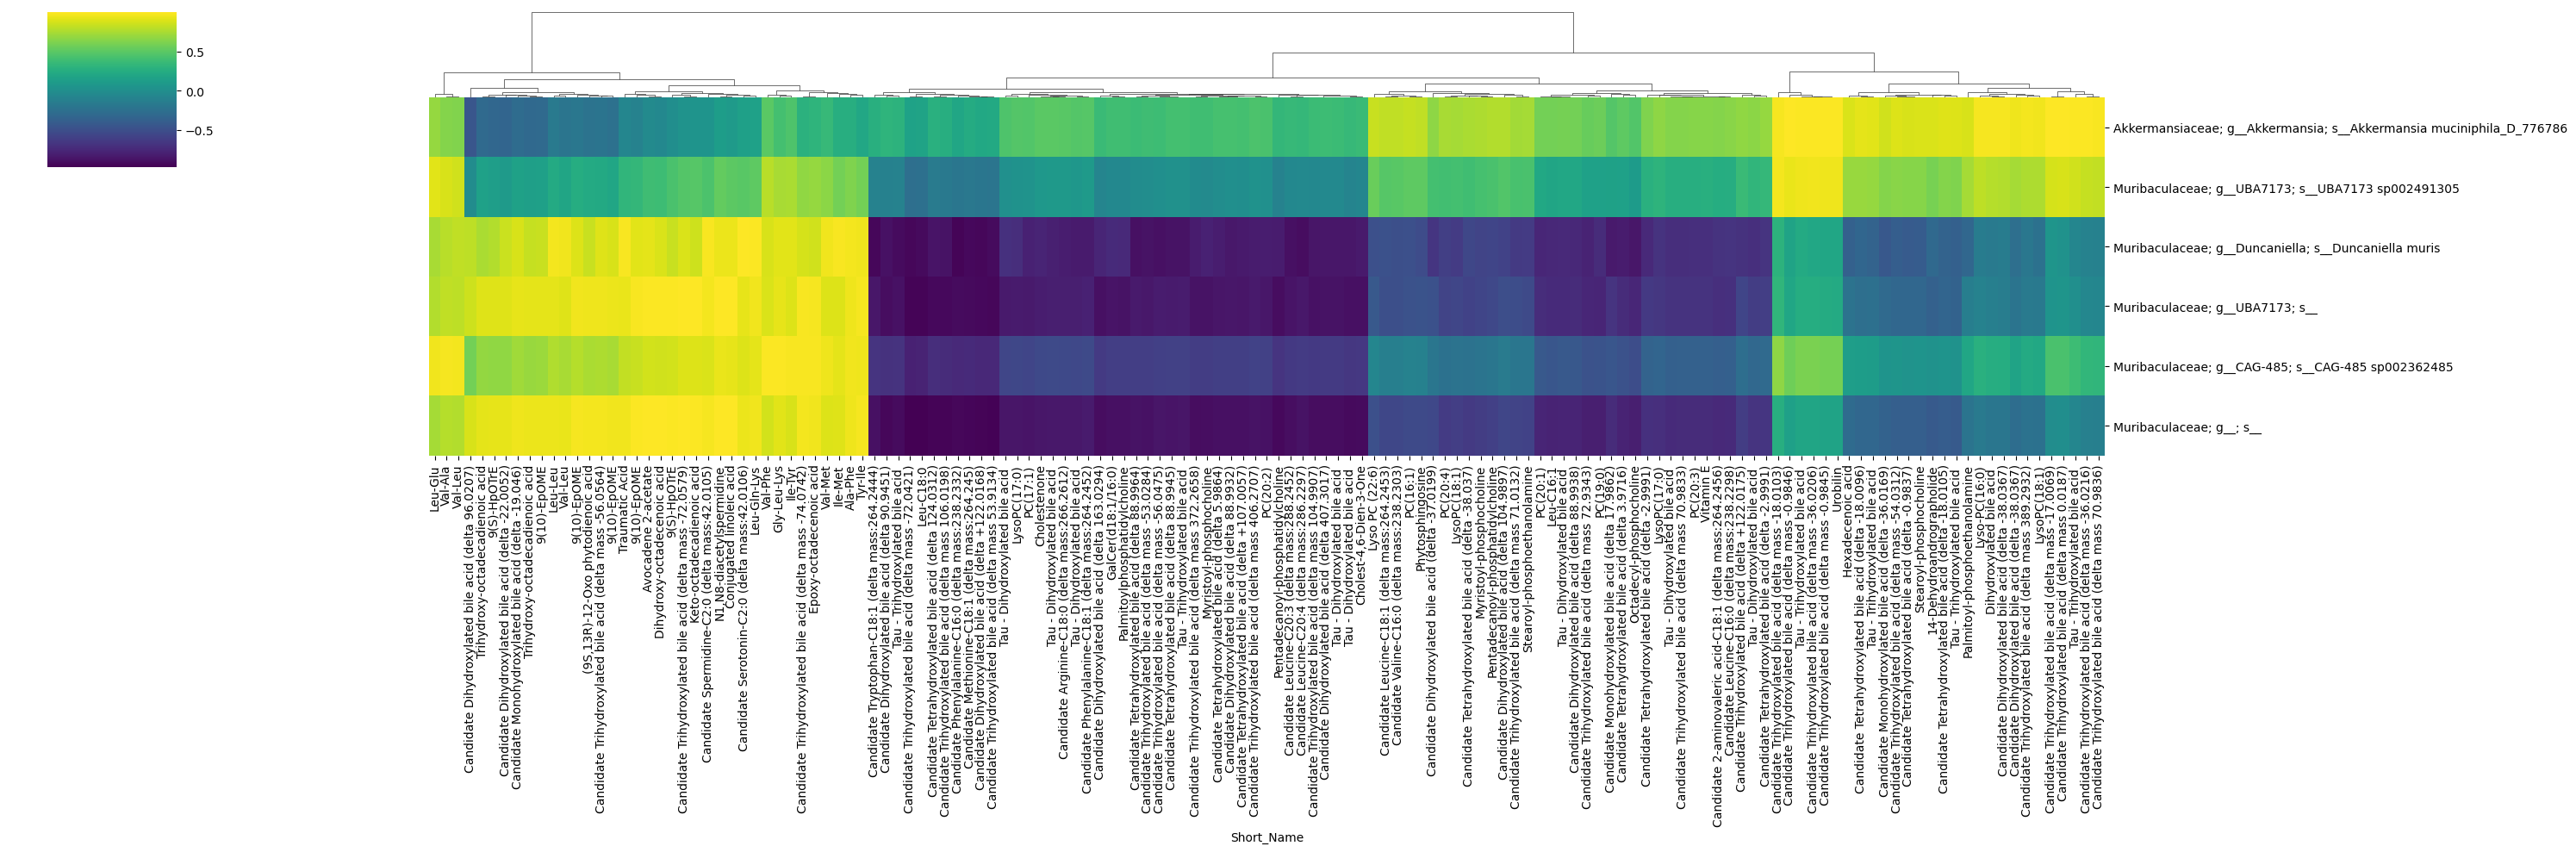

In [248]:
g = sns.clustermap(data=main_fig.T, row_cluster=False, figsize=(30, 10), 
                   xticklabels=True, cmap='viridis')

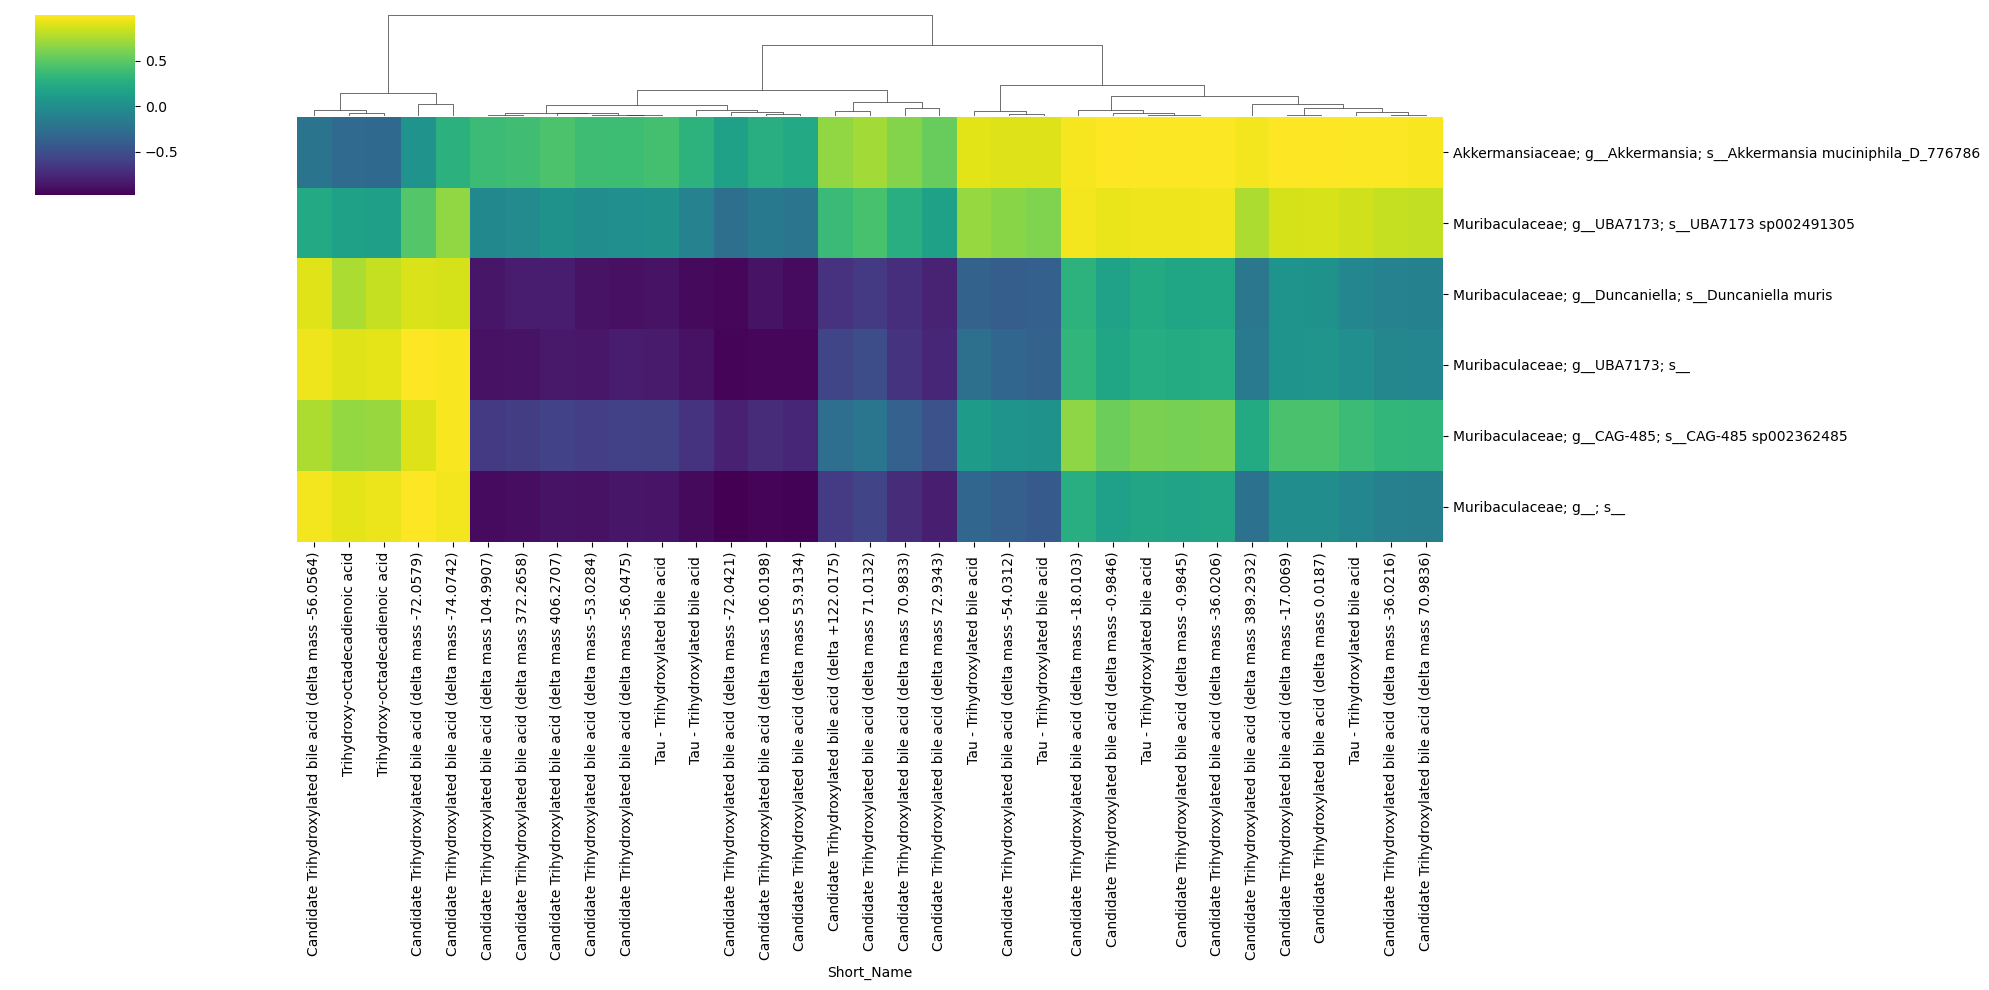

In [249]:
main_fig2 = main_fig.T
main_fig3 = main_fig2.loc[:, main_fig2.columns.str.contains("Trihydroxy", case=False)]
g = sns.clustermap(data=main_fig3, row_cluster=False, figsize=(20, 10), 
                   xticklabels=True, cmap='viridis')

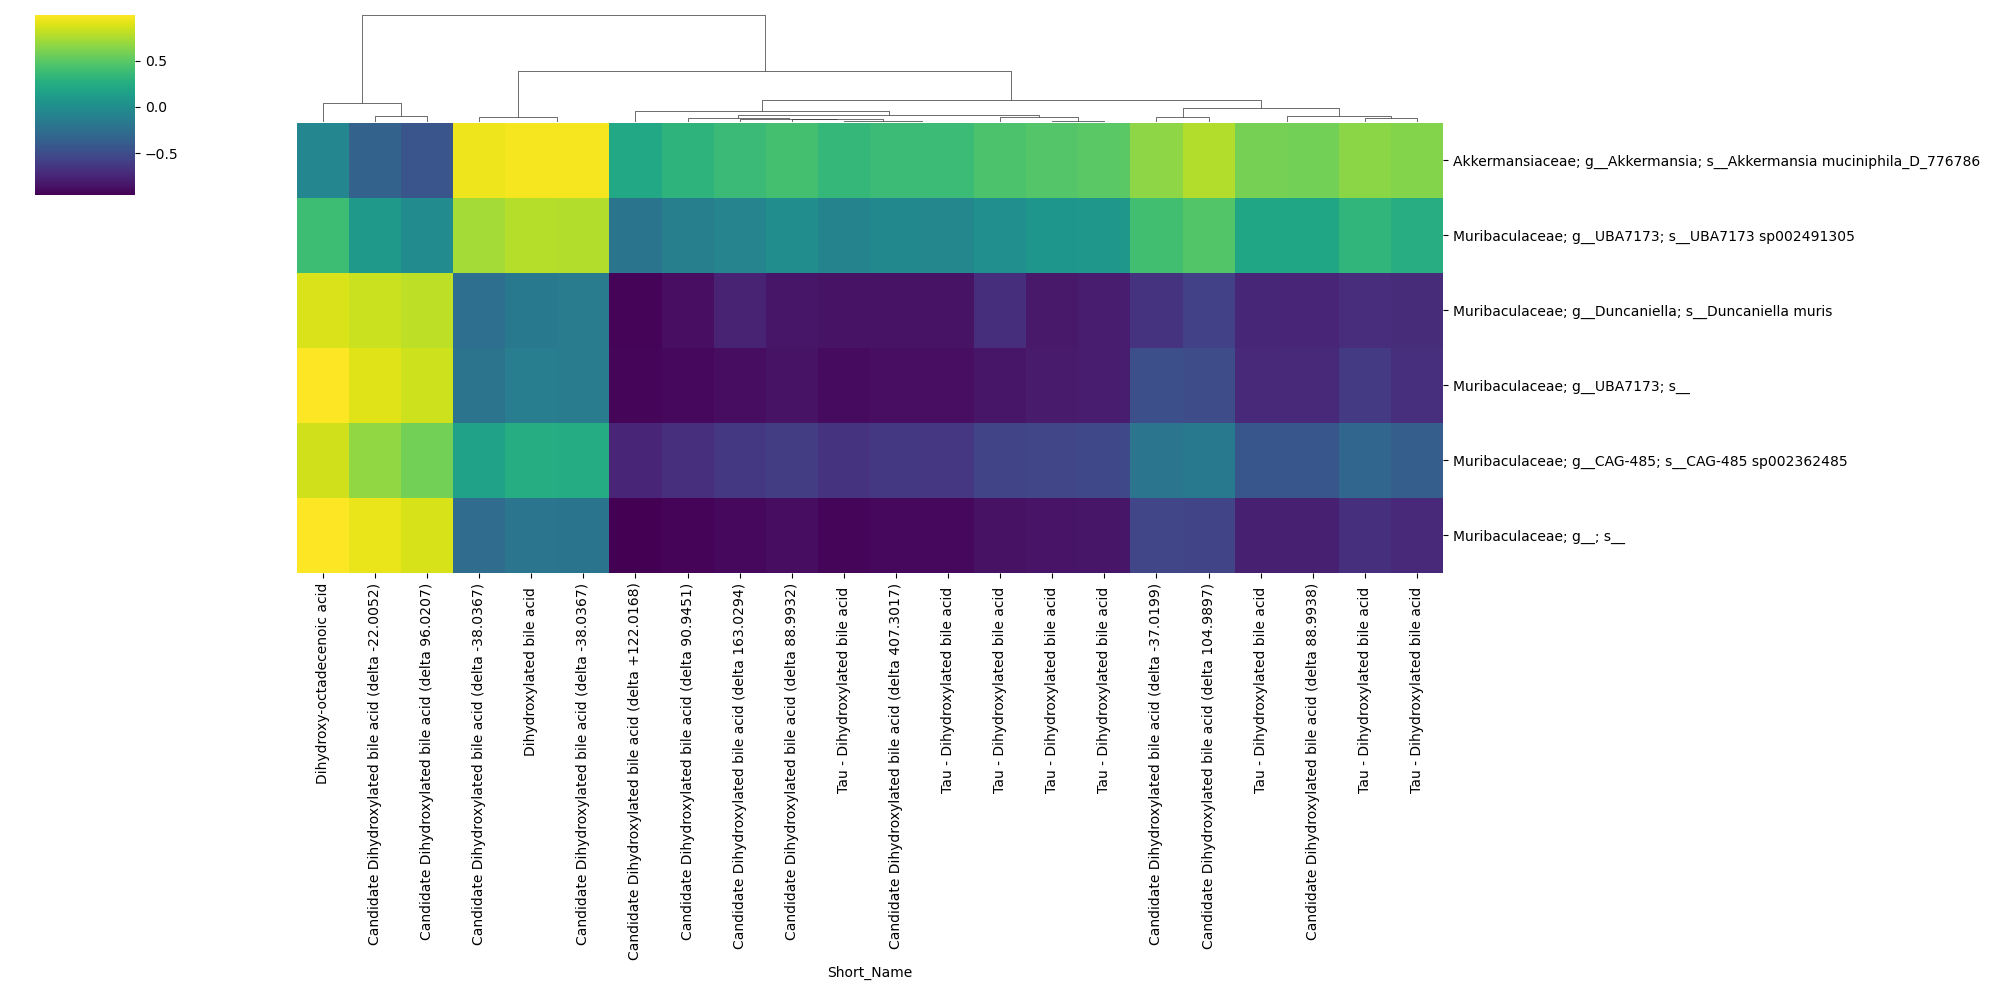

In [250]:
main_fig3 = main_fig2.loc[:, main_fig2.columns.str.contains("Dihydroxy", case=False)]
g = sns.clustermap(data=main_fig3, row_cluster=False, figsize=(20, 10), cmap='viridis')

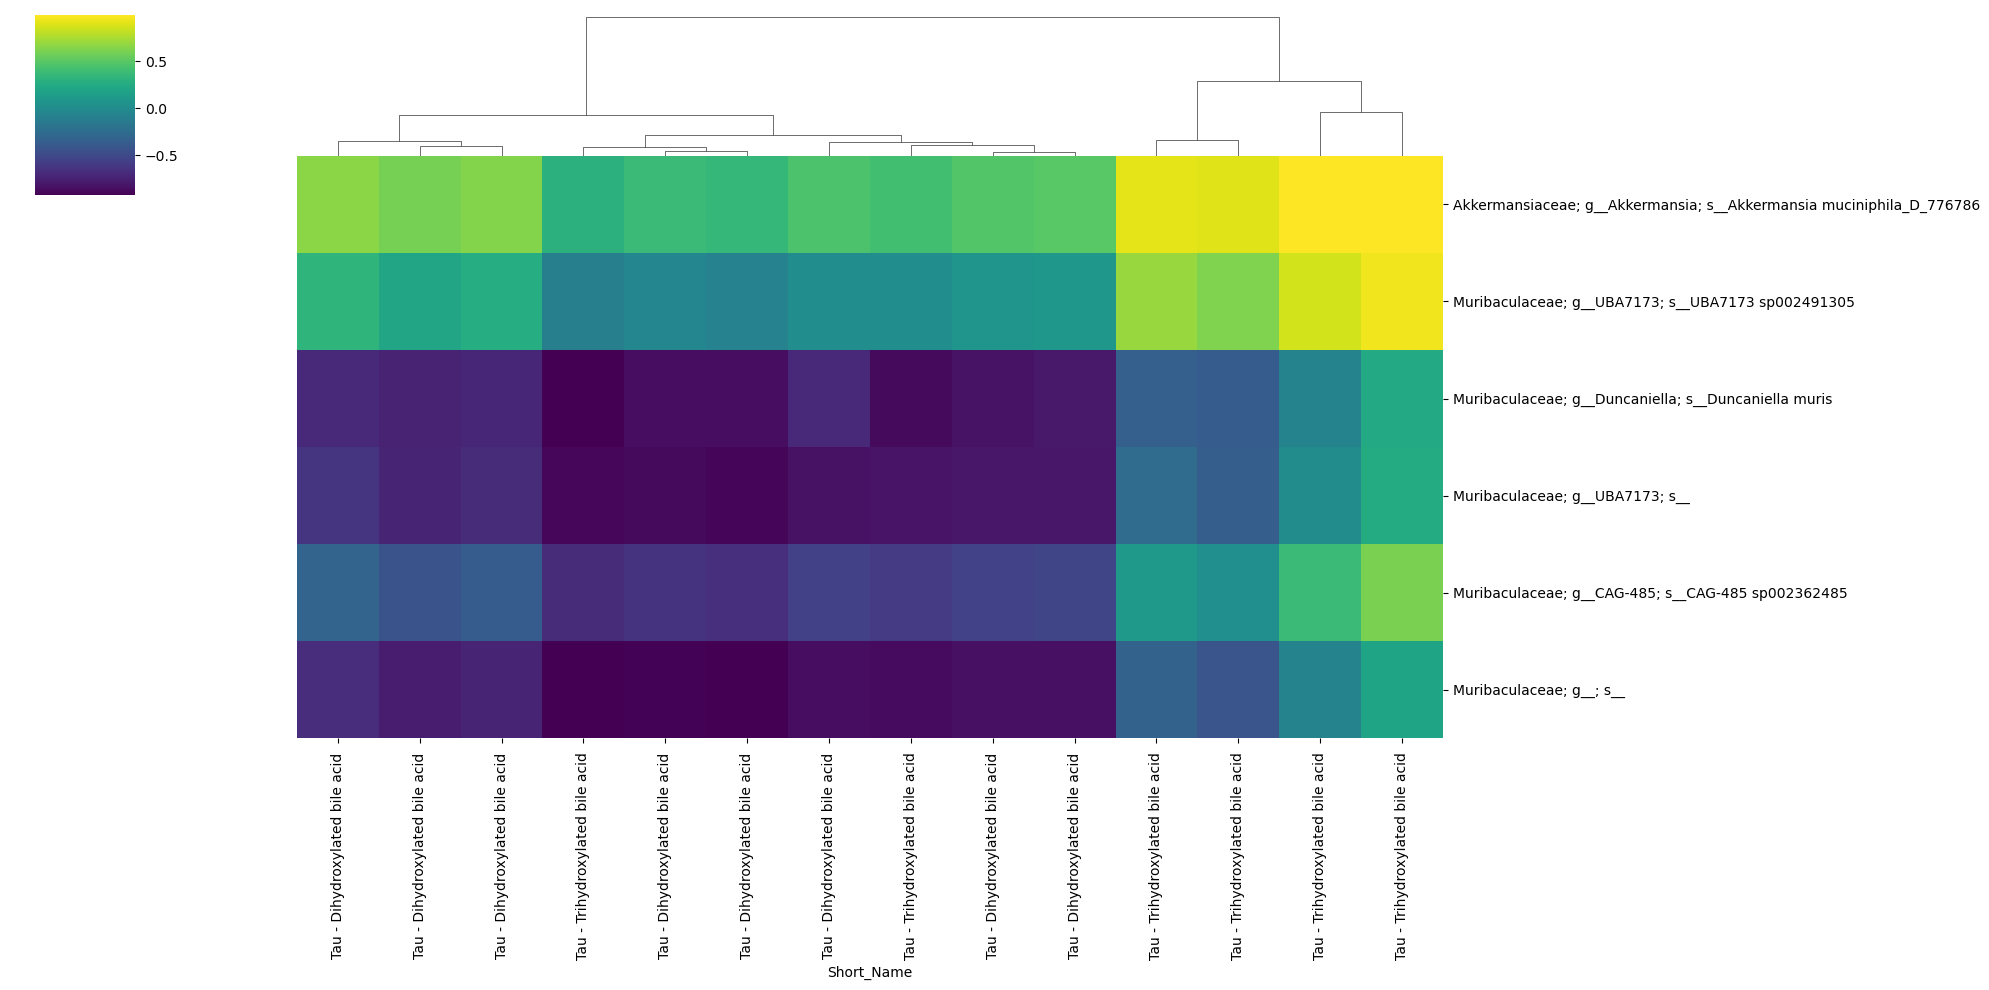

In [251]:
main_fig3 = main_fig2.loc[:, main_fig2.columns.str.contains("Tau", case=True)]
g = sns.clustermap(data=main_fig3, row_cluster=False, figsize=(20, 10), cmap='viridis')

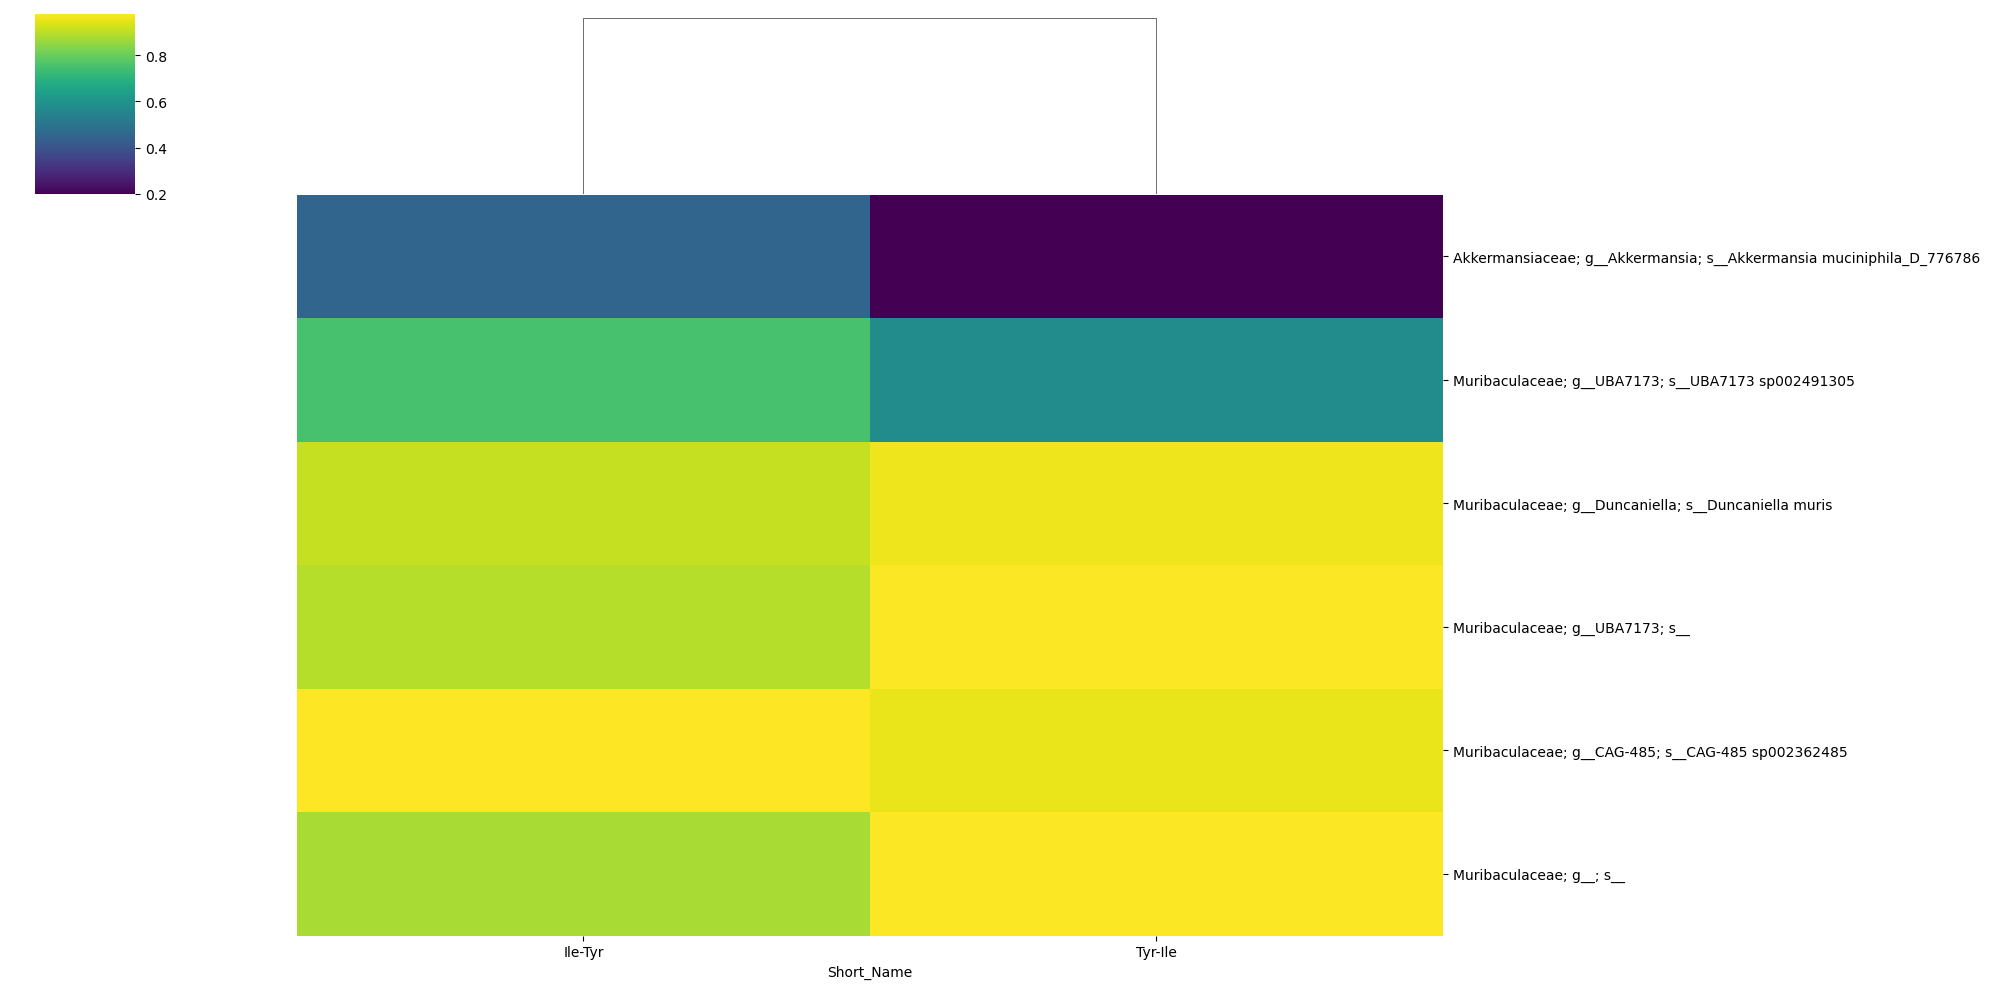

In [252]:
main_fig3 = main_fig2.loc[:, main_fig2.columns.str.contains("Thr|Tyr", case=True)]
g = sns.clustermap(data=main_fig3, row_cluster=False, figsize=(20, 10), cmap='viridis')
#Thr-bMCA (21926), Tyr-bMCA (23485)

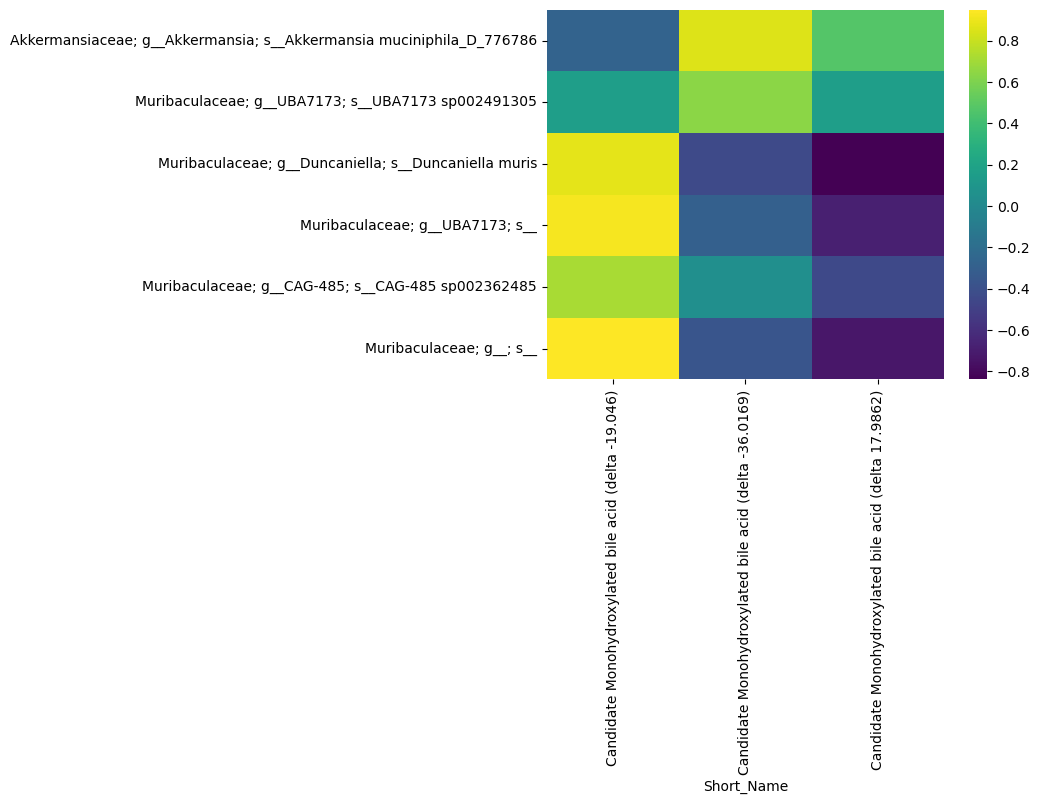

In [253]:
main_fig3 = main_fig2.loc[:, main_fig2.columns.str.contains("Monohydroxy", case=False)]
g = sns.heatmap(data=main_fig3, cmap='viridis')

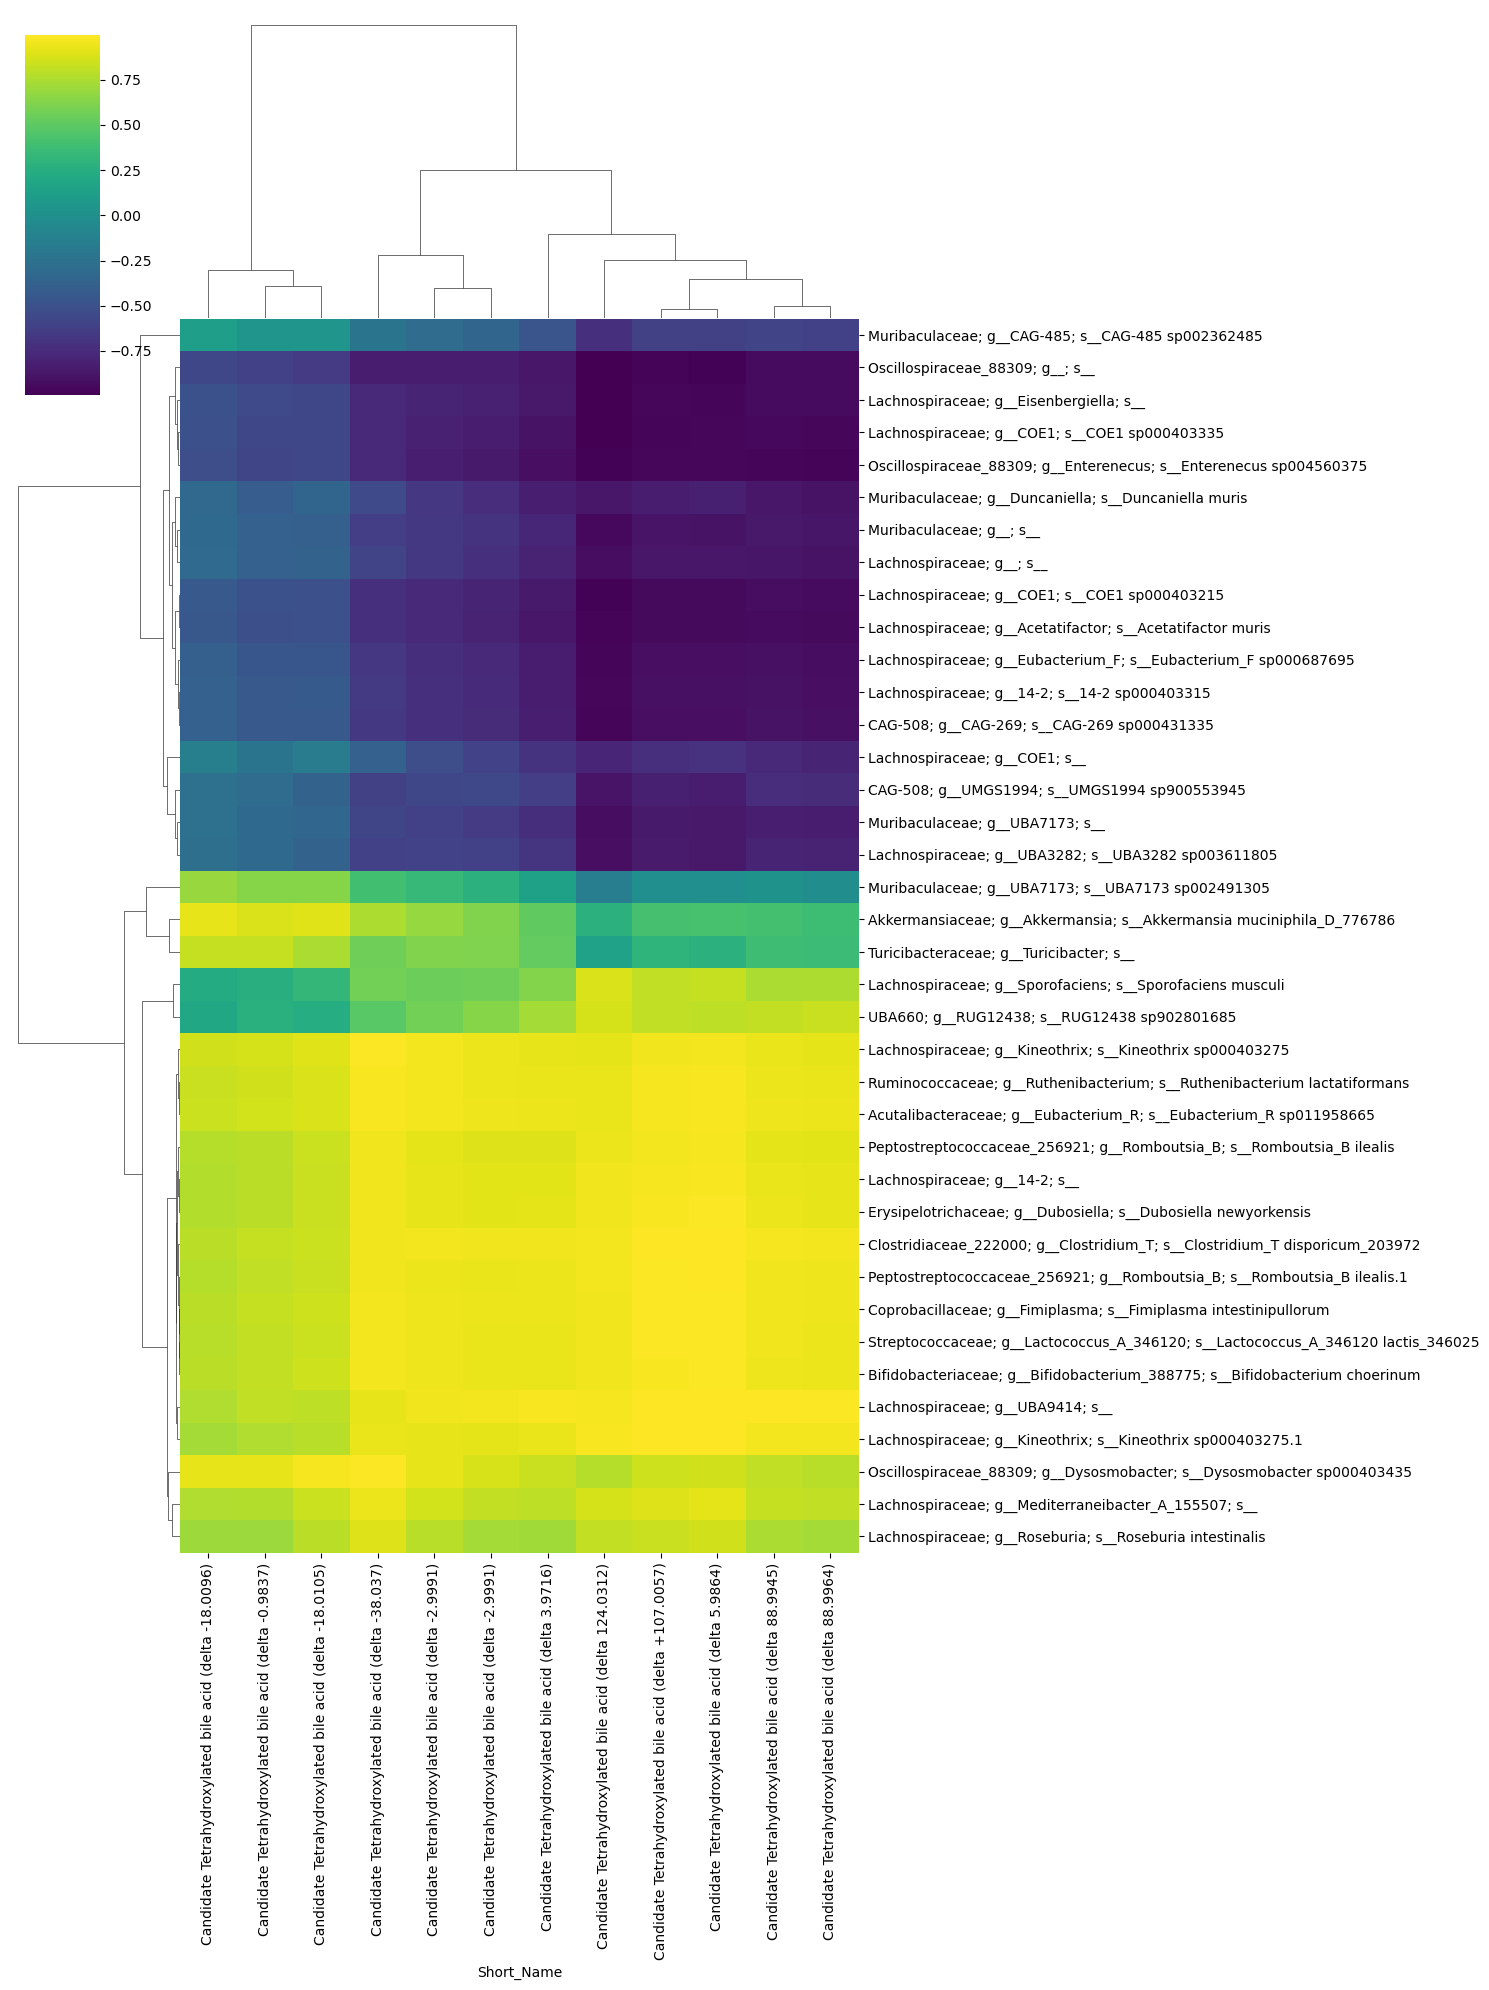

In [256]:
jointRPCA_finalz = jointRPCA_final3.T.copy()
jointRPCA_final_tetras = jointRPCA_finalz.loc[:, jointRPCA_finalz.columns.str.contains("Tetrahydroxy", case=False)]
g = sns.clustermap(data=jointRPCA_final_tetras, yticklabels=True, figsize=(15,20), cmap='viridis')
new_rc_params = {'text.usetex': False, "svg.fonttype": 'none'}
plt.rcParams.update(new_rc_params)
plt.savefig('../figures/jointRPCA_micro-metab_clustermap_tetrahydroxy.svg', dpi=150, bbox_inches = "tight")

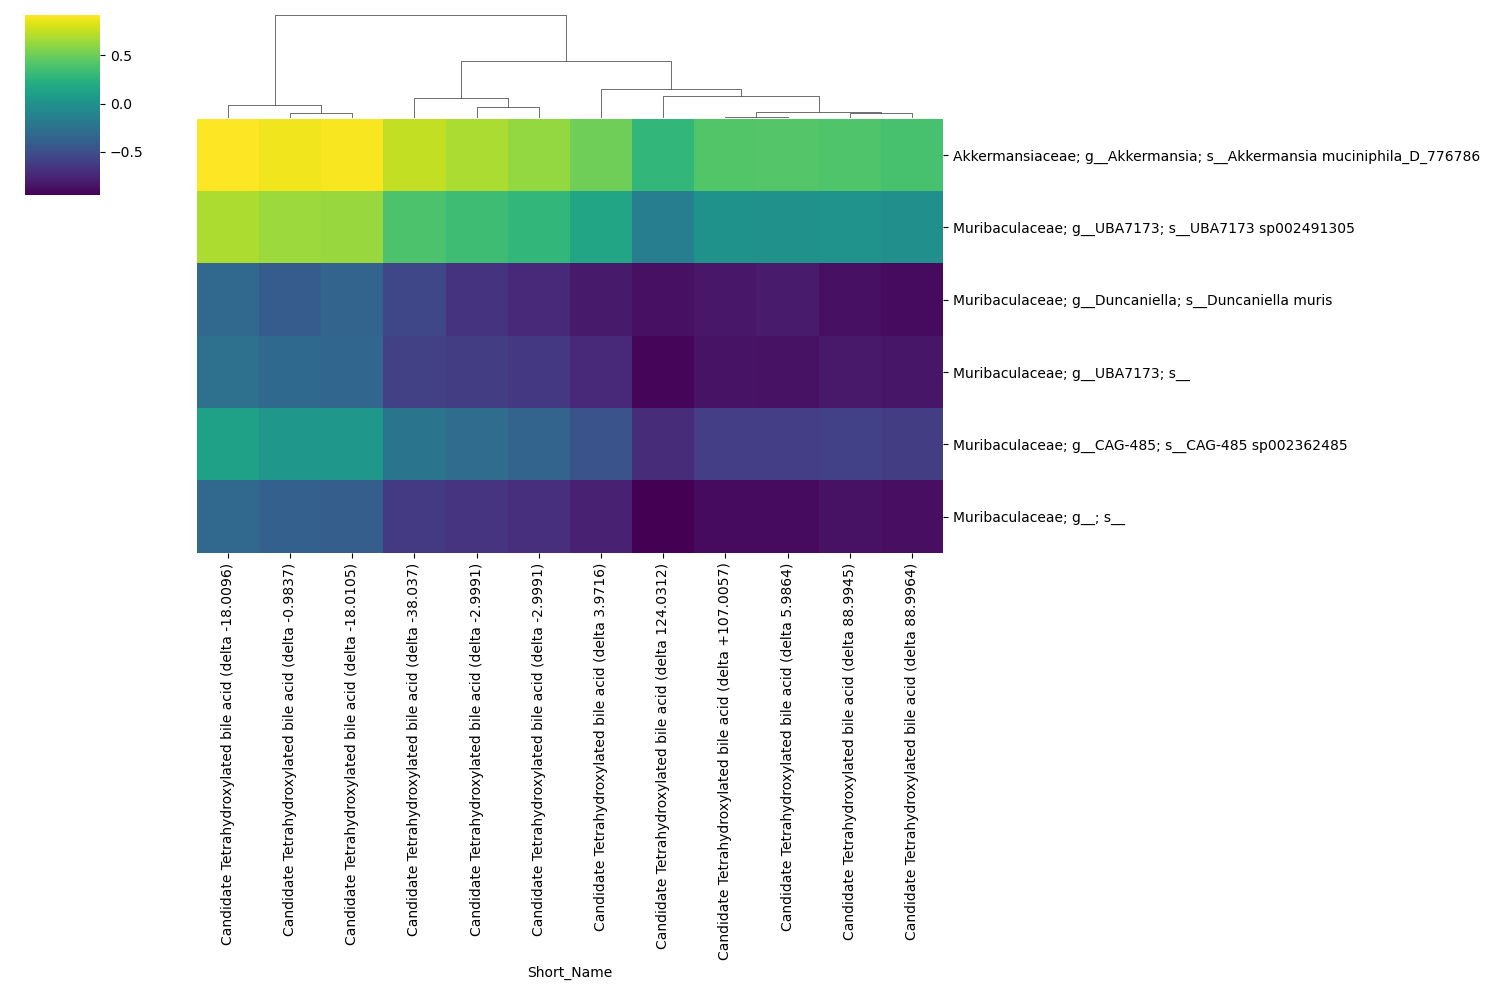

In [255]:
main_fig3 = main_fig2.loc[:, main_fig2.columns.str.contains("Tetrahydroxy", case=False)]
g = sns.clustermap(data=main_fig3, row_cluster=False, figsize=(15, 10), cmap='viridis')
new_rc_params = {'text.usetex': False, "svg.fonttype": 'none'}
plt.rcParams.update(new_rc_params)
plt.savefig('../figures/jointRPCA_micro-metab_tetrahydroxy_short.svg', 
            dpi=150, bbox_inches = "tight")

In [257]:
all_corr_table_mm_named2 = pd.merge(all_corr_table_named.T, metab_list_named[['Compound_Name']],
                                                     left_index=True, right_index=True)
all_corr_table_mm_named2.head()

Oscillospiraceae_88309; g__; s__  \
33139                         -0.900237   
32840                         -0.765766   
29177                         -0.816997   
28764                         -0.749621   
30197                          0.925888   

       Muribaculaceae; g__Duncaniella; s__Duncaniella muris  \
33139                                          -0.673001      
32840                                          -0.498808      
29177                                          -0.607818      
28764                                          -0.491194      
30197                                           0.938912      

       Akkermansiaceae; g__Akkermansia; s__Akkermansia muciniphila_D_776786  \
33139                                           0.644866                      
32840                                           0.813884                      
29177                                           0.740445                      
28764                                           0.824165                      
30197                                           0.093255                      

       CAG-508; g__UMGS1994; s__UMGS1994 sp900553945  \
33139                                      -0.690239   
32840                                      -0.507274   
29177                                      -0.557870   
28764                                      -0.482598   
30197                                       0.917612   

       Coprobacillaceae; g__Fimiplasma; s__Fimiplasma intestinipullorum  \
33139                                           0.989371                  
32840                                           0.924180                  
29177                                           0.950781                  
28764                                           0.914437                  
30197                                          -0.786276                  

       Muribaculaceae; g__UBA7173; s__  Lachnospiraceae; g__14-2; s__  \
33139                        -0.697250                       0.979306   
32840                        -0.496811                       0.911717   
29177                        -0.579637                       0.931797   
28764                        -0.477213                       0.899850   
30197                         0.994544                      -0.780120   

       Lachnospiraceae; g__UBA9414; s__  \
33139                          0.973201   
32840                          0.892026   
29177                          0.938516   
28764                          0.884512   
30197                         -0.834148   

       Streptococcaceae; g__Lactococcus_A_346120; s__Lactococcus_A_346120 lactis_346025  \
33139                                           0.987239                                  
32840                                           0.921208                                  
29177                                           0.945996                                  
28764                                           0.910839                                  
30197                                          -0.785397                                  

       Lachnospiraceae; g__COE1; s__COE1 sp000403215  ...  \
33139                                      -0.817774  ...   
32840                                      -0.649498  ...   
29177                                      -0.727313  ...   
28764                                      -0.634216  ...   
30197                                       0.983666  ...   

       Lachnospiraceae; g__Sporofaciens; s__Sporofaciens musculi  \
33139                                           0.665704           
32840                                           0.471371           
29177                                           0.531101           
28764                                           0.447022           
30197                                          -0.939165           

       UBA660; g__RUG12438; s__RUG12438 sp902801685  \
33139                         

In [266]:
all_corr_table_mm_named2.shape

(141, 39)

In [263]:
main_figz = all_corr_table_mm_named2.copy()
main_figz.drop(columns=['Compound_Name'], inplace=True)
main_figz.head()

Oscillospiraceae_88309; g__; s__  \
33139                         -0.900237   
32840                         -0.765766   
29177                         -0.816997   
28764                         -0.749621   
30197                          0.925888   

       Muribaculaceae; g__Duncaniella; s__Duncaniella muris  \
33139                                          -0.673001      
32840                                          -0.498808      
29177                                          -0.607818      
28764                                          -0.491194      
30197                                           0.938912      

       Akkermansiaceae; g__Akkermansia; s__Akkermansia muciniphila_D_776786  \
33139                                           0.644866                      
32840                                           0.813884                      
29177                                           0.740445                      
28764                                           0.824165                      
30197                                           0.093255                      

       CAG-508; g__UMGS1994; s__UMGS1994 sp900553945  \
33139                                      -0.690239   
32840                                      -0.507274   
29177                                      -0.557870   
28764                                      -0.482598   
30197                                       0.917612   

       Coprobacillaceae; g__Fimiplasma; s__Fimiplasma intestinipullorum  \
33139                                           0.989371                  
32840                                           0.924180                  
29177                                           0.950781                  
28764                                           0.914437                  
30197                                          -0.786276                  

       Muribaculaceae; g__UBA7173; s__  Lachnospiraceae; g__14-2; s__  \
33139                        -0.697250                       0.979306   
32840                        -0.496811                       0.911717   
29177                        -0.579637                       0.931797   
28764                        -0.477213                       0.899850   
30197                         0.994544                      -0.780120   

       Lachnospiraceae; g__UBA9414; s__  \
33139                          0.973201   
32840                          0.892026   
29177                          0.938516   
28764                          0.884512   
30197                         -0.834148   

       Streptococcaceae; g__Lactococcus_A_346120; s__Lactococcus_A_346120 lactis_346025  \
33139                                           0.987239                                  
32840                                           0.921208                                  
29177                                           0.945996                                  
28764                                           0.910839                                  
30197                                          -0.785397                                  

       Lachnospiraceae; g__COE1; s__COE1 sp000403215  ...  \
33139                                      -0.817774  ...   
32840                                      -0.649498  ...   
29177                                      -0.727313  ...   
28764                                      -0.634216  ...   
30197                                       0.983666  ...   

       CAG-508; g__CAG-269; s__CAG-269 sp000431335  \
33139                                    -0.777449   
32840                                    -0.596801   
29177                                    -0.678573   
28764                                    -0.580365   
30197                                     0.993372   

       Lachnospiraceae; g__Sporofaciens; s__Sporofaciens musculi  \
33139                                           0.665704           
32840                            

In [293]:
main_figz = all_corr_table_mm_named2.reset_index().copy()
main_figz2 = pd.merge(main_figz, short_names, how='outer', left_on='Compound_Name', right_index=True)
main_figz2.dropna(subset=['Oscillospiraceae_88309; g__; s__'], inplace=True)
main_figz2['Short_Name'].isna().sum()

0

In [296]:
main_figz2['index'] = main_figz2['index'].astype(int)
main_figz2['Name'] = main_figz2['index'].astype(str)+" - "+main_figz2['Short_Name'].astype(str)
main_figz2.set_index(['Name'], inplace=True)
main_figz2.drop(columns=['Compound_Name', 'index', 'Short_Name'], inplace=True)
main_figz2.drop_duplicates(inplace=True)
main_figz2.shape

(141, 38)

In [297]:
main_figz2.head()

Oscillospiraceae_88309; g__; s__  \
Name                                                                                   
33139 - Candidate Leucine-C16:0 (delta mass:238...                         -0.900237   
32840 - Candidate Valine-C16:0 (delta mass:238....                         -0.765766   
29177 - PC(20:4)                                                           -0.816997   
28764 - PC(16:1)                                                           -0.749621   
30197 - Conjugated linoleic acid                                            0.925888   

                                                    Muribaculaceae; g__Duncaniella; s__Duncaniella muris  \
Name                                                                                                       
33139 - Candidate Leucine-C16:0 (delta mass:238...                                          -0.673001      
32840 - Candidate Valine-C16:0 (delta mass:238....                                          -0.498808      
29177 - PC(20:4)                                                                            -0.607818      
28764 - PC(16:1)                                                                            -0.491194      
30197 - Conjugated linoleic acid                                                             0.938912      

                                                    Akkermansiaceae; g__Akkermansia; s__Akkermansia muciniphila_D_776786  \
Name                                                                                                                       
33139 - Candidate Leucine-C16:0 (delta mass:238...                                           0.644866                      
32840 - Candidate Valine-C16:0 (delta mass:238....                                           0.813884                      
29177 - PC(20:4)                                                                             0.740445                      
28764 - PC(16:1)                                                                             0.824165                      
30197 - Conjugated linoleic acid                                                             0.093255                      

                                                    CAG-508; g__UMGS1994; s__UMGS1994 sp900553945  \
Name                                                                                                
33139 - Candidate Leucine-C16:0 (delta mass:238...                                      -0.690239   
32840 - Candidate Valine-C16:0 (delta mass:238....                                      -0.507274   
29177 - PC(20:4)                                                                        -0.557870   
28764 - PC(16:1)                                                                        -0.482598   
30197 - Conjugated linoleic acid                                                         0.917612   

                                                    Coprobacillaceae; g__Fimiplasma; s__Fimiplasma intestinipullorum  \
Name                                                                                                                   
33139 - Candidate Leucine-C16:0 (delta mass:238...                                           0.989371                  
32840 - Candidate Valine-C16:0 (delta mass:238....                                           0.924180                  
29177 - PC(20:4)                                                                             0.950781                  
28764 - PC(16:1)                                                                             0.914437                  
30197 - Conjugated linoleic acid                                                            -0.786276                  

                                                    Muribaculaceae; g__UBA7173; s__  \
Name                                                                                  
33139 - Candidate Leucine-C16:0 (delta mass:238...                        -0.697250   

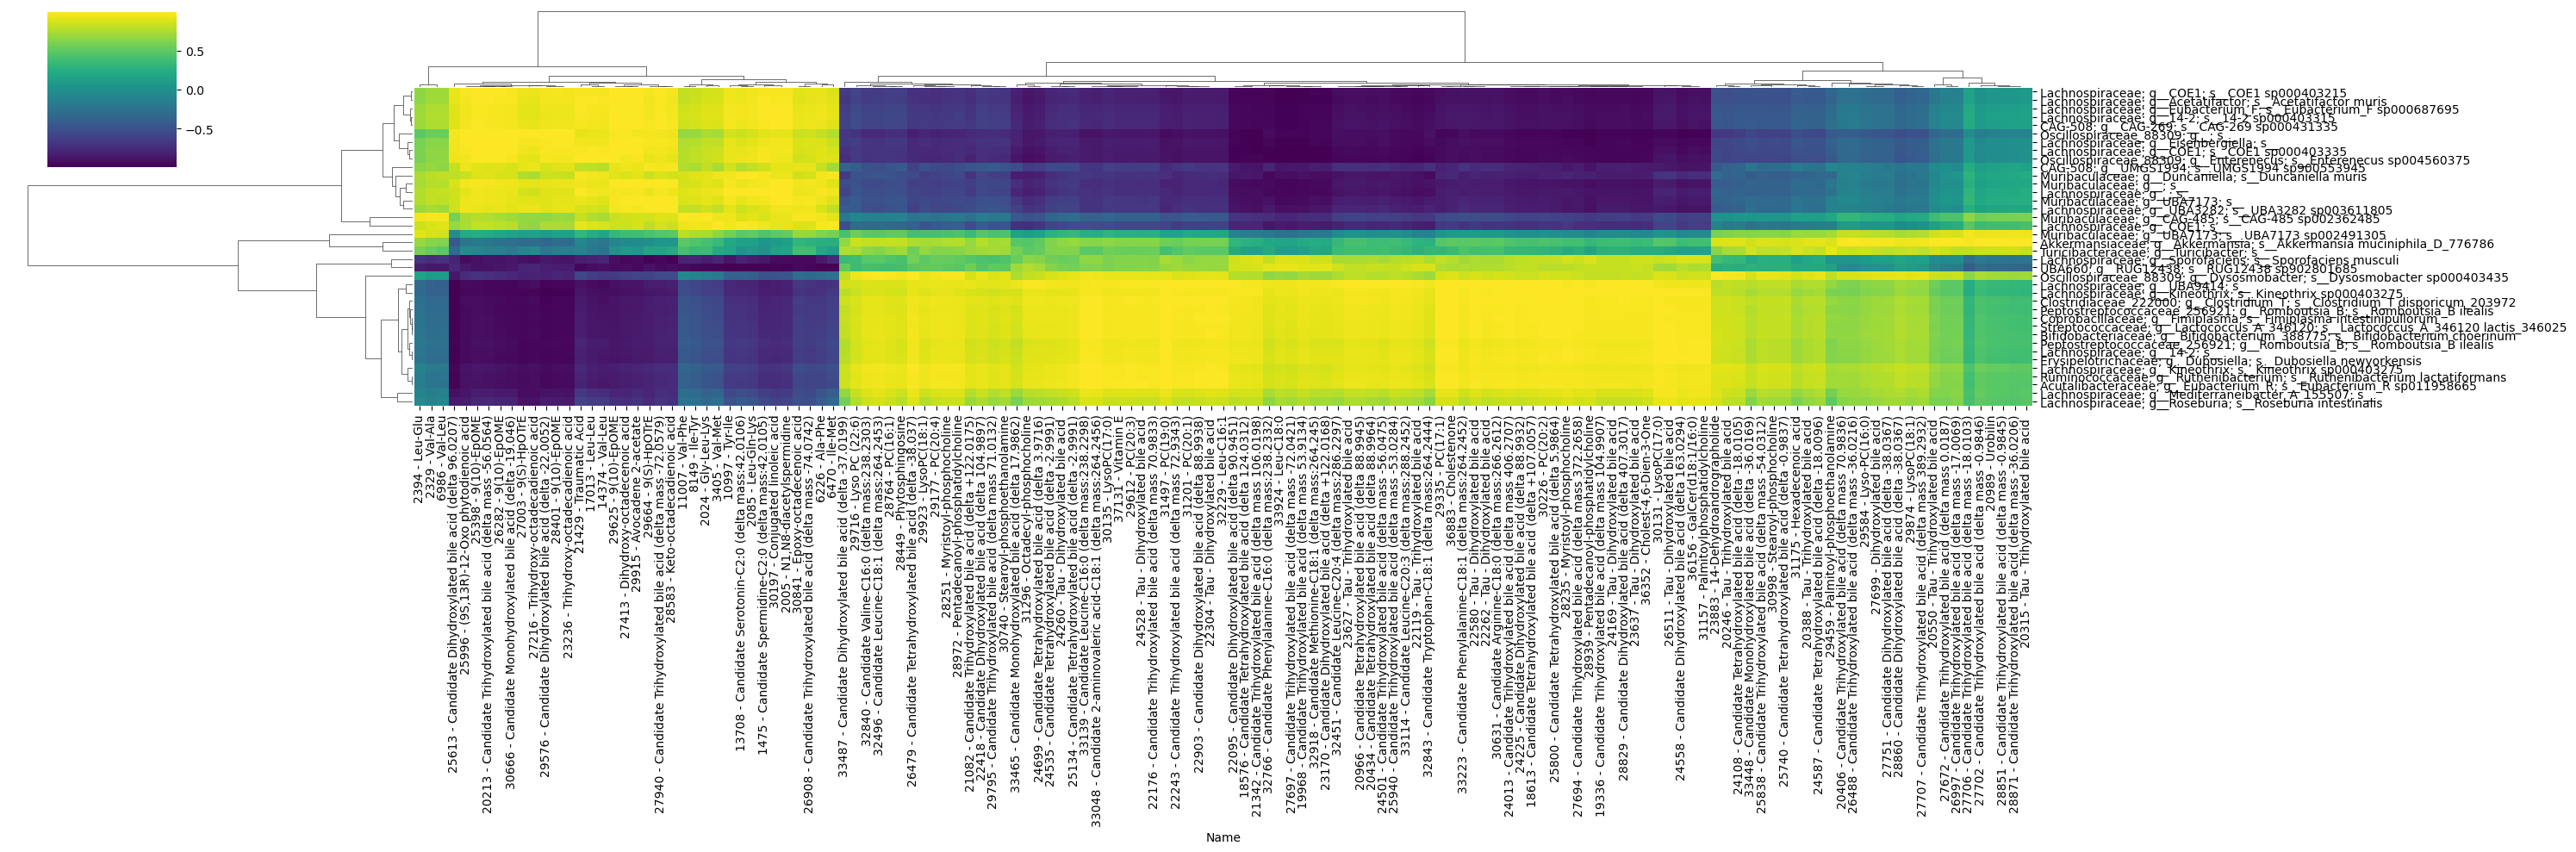

In [299]:
main_figz3 = main_figz2.T
g = sns.clustermap(data=main_figz3, figsize=(30, 10), 
                   xticklabels=True, cmap='viridis')

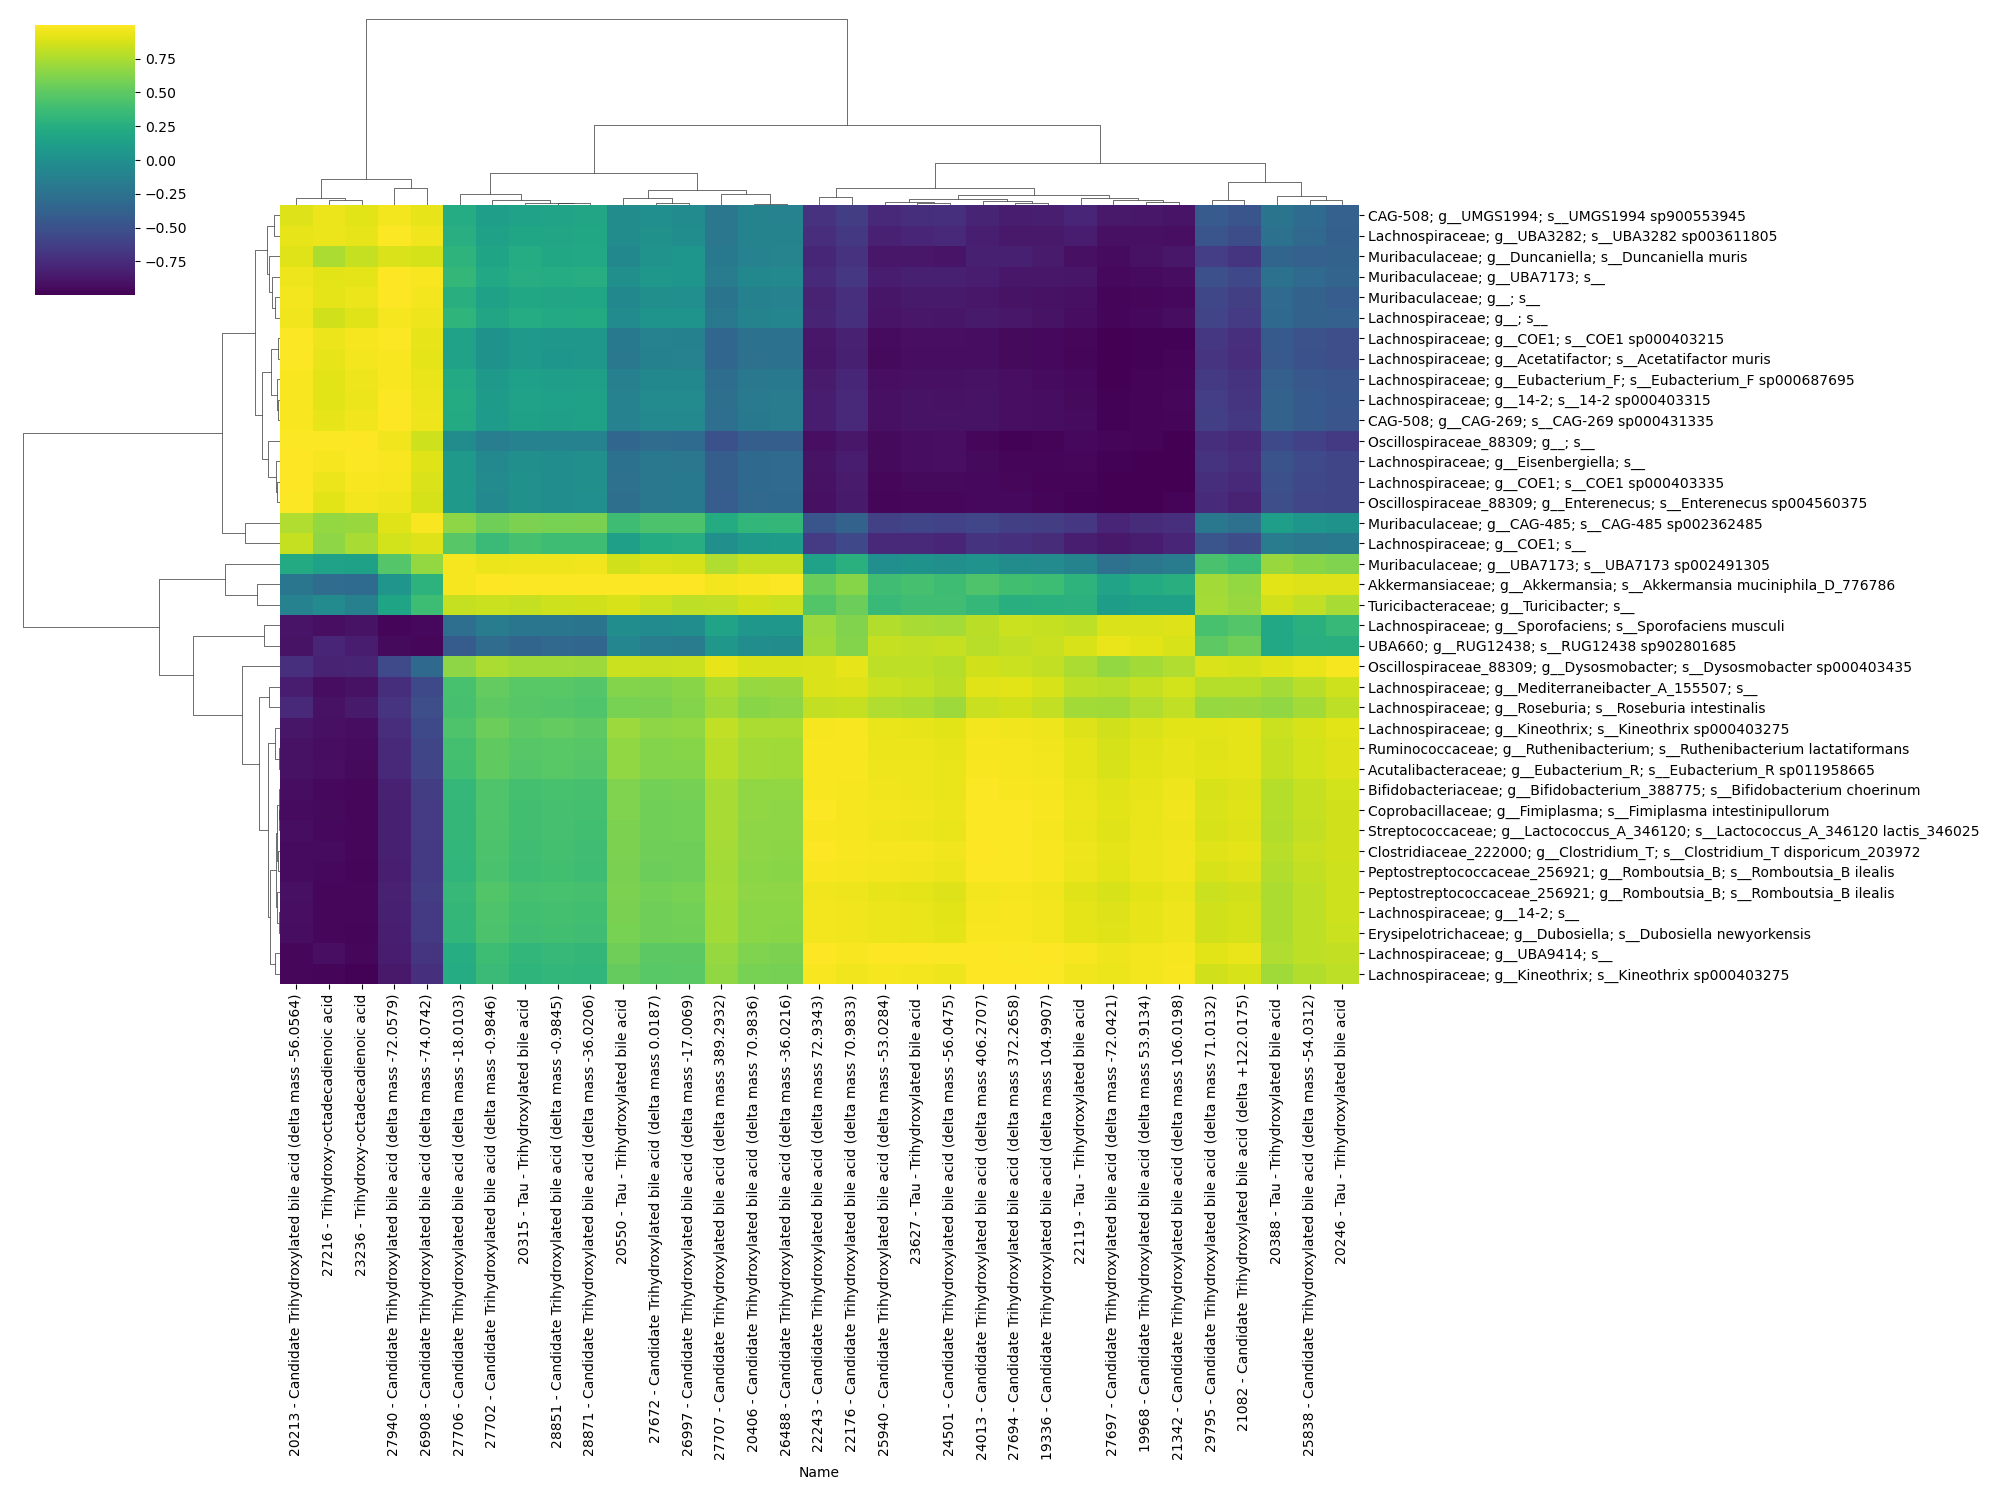

In [305]:
main_figz4 = main_figz3.loc[:, main_figz3.columns.str.contains("Trihydroxy", case=False)]
g = sns.clustermap(data=main_figz4, figsize=(20, 15), 
                   xticklabels=True, cmap='viridis')

# Log Ratios

In [308]:
md = pd.read_csv('../data/Microbiome/longIHC_metadata_cleaned.txt', sep='\t', index_col=0)
md.columns

Index(['anonymized_name', 'cage_food_consumption_g', 'cage_location',
       'cage_notes', 'cage_number', 'collection_timestamp', 'description',
       'diet', 'dna_extracted', 'dob', 'elevation', 'empo_1', 'empo_2',
       'empo_3', 'env_biome', 'env_feature', 'env_material', 'env_package',
       'experiment_duration', 'exposure_start', 'exposure_type',
       'general_notes', 'genotype', 'geo_loc_name', 'host_age',
       'host_age_units', 'host_body_habitat', 'host_body_product',
       'host_body_site', 'host_life_stage', 'host_scientific_name',
       'host_subject_id', 'host_taxid', 'host_weight', 'host_weight_units',
       'latitude', 'longitude', 'metabolomics_sample_id', 'mouse_notes',
       'mouse_number', 'physical_specimen_location',
       'physical_specimen_remaining', 'qiita_study_id', 'sample_name_orit',
       'sample_type', 'scientific_name', 'sex', 'taxon_id', 'timepoint',
       'title', 'treatment', 'diet_short', 'diet_exp'],
      dtype='object')

In [313]:
main_metab_lr = pd.read_csv('../data/Metabolome/sz_main_metabolome_log_ratio.csv', index_col=0)
main_metab_lr.rename(columns={'Log_Ratio':'Main_Metab_Log_Ratio'}, inplace=True)
main_metab_lr.head()

Main_Metab_Log_Ratio
SampleID                       
A15_85_01              2.070149
A15_85_05              2.337320
A15_85_10              1.451339
A15_85_15              1.597552
A15_85_20              2.266473

In [314]:
main_metabLR_named = pd.merge(main_metab_lr, md, left_index=True, right_on='metabolomics_sample_id')
main_metabLR_named.shape

(204, 54)

In [315]:
main_metabLR_named.head()

Main_Metab_Log_Ratio anonymized_name  \
sample_name                                               
11548.A15.85.1                 2.070149        A15.85.1   
11548.A15.85.5                 2.337320        A15.85.5   
11548.A15.85.10                1.451339       A15.85.10   
11548.A15.85.10.b              1.451339       A15.85.10   
11548.A15.85.15                1.597552       A15.85.15   

                  cage_food_consumption_g cage_location  \
sample_name                                               
11548.A15.85.1             not applicable      on shelf   
11548.A15.85.5                         81      on shelf   
11548.A15.85.10                        64      on shelf   
11548.A15.85.10.b                      64      on shelf   
11548.A15.85.15                      95.8      on shelf   

                                                    cage_notes cage_number  \
sample_name                                                                  
11548.A15.85.1                                   fighting cage         A15   
11548.A15.85.5                                             NaN         A15   
11548.A15.85.10    started changing air cages 4x/wk 10/26/2017         A15   
11548.A15.85.10.b  started changing air cages 4x/wk 10/26/2017         A15   
11548.A15.85.15                                            NaN         A15   

                  collection_timestamp  \
sample_name                              
11548.A15.85.1           9/26/17 11:00   
11548.A15.85.5          10/10/17 11:00   
11548.A15.85.10         10/27/17 11:00   
11548.A15.85.10.b       10/27/17 11:00   
11548.A15.85.15         11/14/17 11:00   

                                                  description          diet  \
sample_name                                                                   
11548.A15.85.1     Mouse 85 baseline stool collection 1 of 20  Regular chow   
11548.A15.85.5              Mouse 85 stool collection 5 of 20  Regular chow   
11548.A15.85.10            Mouse 85 stool collection 10 of 20  Regular chow   
11548.A15.85.10.b          Mouse 85 stool collection 10 of 20  Regular chow   
11548.A15.85.15            Mouse 85 stool collection 15 of 20  Regular chow   

                   dna_extracted  ... sample_name_orit  sample_type  \
sample_name                       ...                                 
11548.A15.85.1              True  ...         a15.85.1        feces   
11548.A15.85.5              True  ...         A15.85.5        feces   
11548.A15.85.10             True  ...        a15.85.10        feces   
11548.A15.85.10.b           True  ...        a15.85.10        feces   
11548.A15.85.15             True  ...        A15.85.15        feces   

                        scientific_name   sex taxon_id     timepoint  \
sample_name                                                            
11548.A15.85.1     mouse gut metagenome  male   410661           NaN   
11548.A15.85.5     mouse gut metagenome  male   410661           NaN   
11548.A15.85.10    mouse gut metagenome  male   410661  not provided   
11548.A15.85.10.b  mouse gut metagenome  male   410661  not provided   
11548.A15.85.15    mouse gut metagenome  male   410661           NaN   

                         title     treatment diet_short diet_exp  
sample_name                                                       
11548.A15.85.1     10 week IHC           NaN         RC   RC_AIR  
11548.A15.85.5     10 week IHC           NaN         RC   RC_AIR  
11548.A15.85.10    10 week IHC  not provided         RC   RC_AIR  
11548.A15.85.10.b  10 week IHC  not provided         RC   RC_AIR  
11548.A15.85.15    10 week IHC           NaN         RC   RC_AIR  

[5 rows x 54 columns]

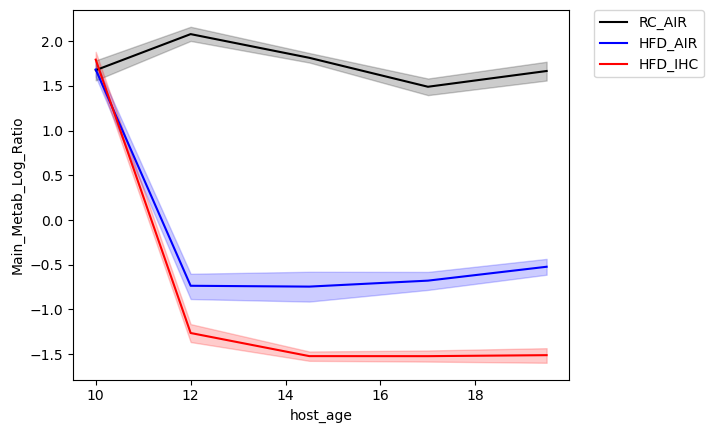

In [318]:
sns.lineplot(data=main_metabLR_named, x='host_age', y='Main_Metab_Log_Ratio', hue='diet_exp',
            hue_order=['RC_AIR', 'HFD_AIR', 'HFD_IHC'], palette=['black', 'blue', 'red'], ci=68)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
new_rc_params = {'text.usetex': False, "svg.fonttype": 'none'}
plt.rcParams.update(new_rc_params)
plt.savefig('../figures/jointRPCA_main-metab-LR_lineplot_SEM.svg', dpi=150, bbox_inches = "tight")

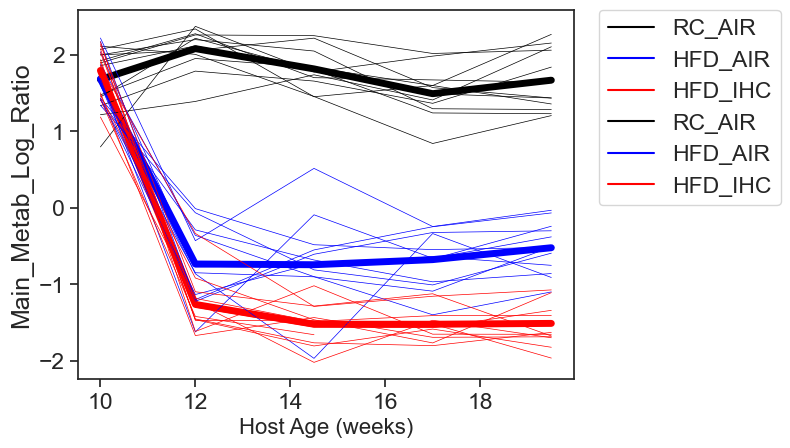

In [320]:
sns.set(style='ticks', font_scale=1.5)
sns.lineplot(data=main_metabLR_named, x='host_age', y='Main_Metab_Log_Ratio', hue='diet_exp',
            hue_order=['RC_AIR', 'HFD_AIR', 'HFD_IHC'], palette=['black', 'blue', 'red'], ci=None, linewidth=5)
sns.lineplot(data=main_metabLR_named, x='host_age', y='Main_Metab_Log_Ratio', hue='diet_exp',
            hue_order=['RC_AIR', 'HFD_AIR', 'HFD_IHC'], palette=['black', 'blue', 'red'], 
            units="host_subject_id", estimator=None, lw=0.5,)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Host Age (weeks)', fontsize=16)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/jointRPCA_main-metab-LR_lineplot_indv.svg', dpi=150, bbox_inches = "tight")
plt.show()

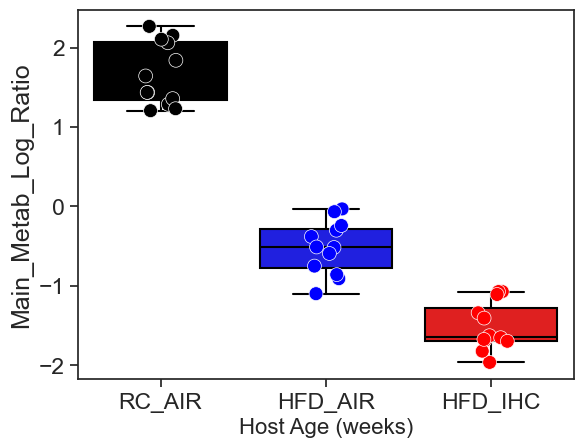

In [322]:
sns.set(style='ticks', font_scale=1.5)

main_metabLR_named19 = main_metabLR_named[main_metabLR_named['host_age']==19.5].copy()

ax = sns.boxplot(data=main_metabLR_named19, y='Main_Metab_Log_Ratio', x='diet_exp',
            order=['RC_AIR', 'HFD_AIR', 'HFD_IHC'], palette=['black', 'blue', 'red'])

ax = sns.stripplot(data=main_metabLR_named19, y='Main_Metab_Log_Ratio', x='diet_exp',
            order=['RC_AIR', 'HFD_AIR', 'HFD_IHC'], palette=['black', 'blue', 'red'],
                  linewidth=0.5, edgecolor='white', size=10,)

plt.xlabel('Host Age (weeks)', fontsize=16)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/jointRPCA_main-metab-LR_boxscatterplot.svg', dpi=150, bbox_inches = "tight")
plt.show()

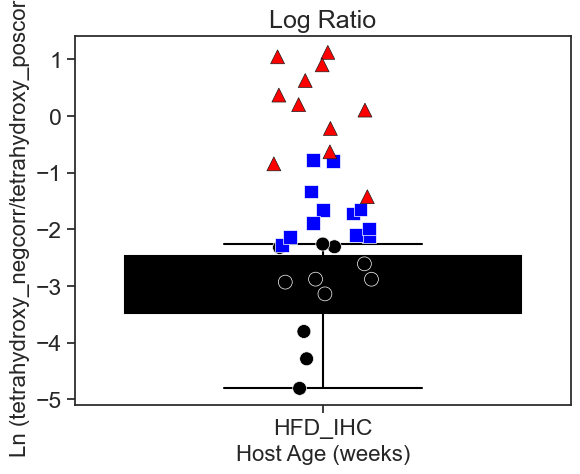

In [101]:
#for use in plotting environment
sns.set(style='ticks', font_scale=1.5)

short_tetra_named19 = short_tetra_named[short_tetra_named['host_age']==19.5].copy()

ax = sns.boxplot(data=short_tetra_named19, y='Current_Natural_Log_Ratio', x='diet_exp',
            order=['RC_AIR', 'HFD_AIR', 'HFD_IHC'], palette=['black', 'blue', 'red'])

sns.stripplot(data=short_tetra_named19[short_tetra_named19['diet_exp']=='RC_AIR'], 
                   y='Current_Natural_Log_Ratio', x='diet_exp',
                   linewidth=0.5, edgecolor='white', size=10, color='black', marker='o',)
sns.stripplot(data=short_tetra_named19[short_tetra_named19['diet_exp']=='HFD_AIR'], 
                   y='Current_Natural_Log_Ratio', x='diet_exp', 
                   linewidth=0.5, edgecolor='white', size=10, color='blue', marker='s',)
sns.stripplot(data=short_tetra_named19[short_tetra_named19['diet_exp']=='HFD_IHC'], 
                   y='Current_Natural_Log_Ratio', x='diet_exp', 
                   linewidth=0.5, edgecolor='k', size=10, color='red', marker='^',)

plt.title('Log Ratio', fontsize=18)
plt.ylabel('Ln (tetrahydroxy_negcorr/tetrahydroxy_poscorr)', fontsize=16)
plt.xlabel('Host Age (weeks)', fontsize=16)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/jointRPCA_micro-metab-overlap-superfilt_boxscatterplot_tetrahydroxy_short.svg', dpi=300, bbox_inches = "tight")
plt.show()

In [323]:
from itertools import combinations
from scipy.stats import mannwhitneyu

In [324]:
main_metabLR_named19.shape

(36, 54)

In [329]:
for x in combinations(['RC_AIR', 'HFD_AIR', 'HFD_IHC'], 2):
    cond1 = main_metabLR_named19[main_metabLR_named19['diet_exp']==x[0]].Main_Metab_Log_Ratio.values
    cond2 = main_metabLR_named19[main_metabLR_named19['diet_exp']==x[1]].Main_Metab_Log_Ratio.values
    stat, pval = mannwhitneyu(cond1, cond2, method="auto", alternative='two-sided')
    print("Comparison of ", x[0], "and ", x[1])
    print("p-value: ", pval)
    print("____________________________________________________________________")

Comparison of  RC_AIR and  HFD_AIR
p-value:  3.6584553538971e-05
____________________________________________________________________
Comparison of  RC_AIR and  HFD_IHC
p-value:  3.644202729246209e-05
____________________________________________________________________
Comparison of  HFD_AIR and  HFD_IHC
p-value:  5.983591793045863e-05
____________________________________________________________________


In [330]:
Muri_Akk = pd.read_csv('../data/Microbiome/lr-metrics/tempted/MuribaculaceaeAkkermansiaceae_LR_merged.tsv', sep='\t', index_col=0)
Muri_Akk.head()

Muribaculaceae_Akkermansiaceae anonymized_name  \
#SampleID                                                         
11548.A16.91.4                         3.512776        A16.91.4   
11548.A15.85.11                        2.237845       A15.85.11   
11548.A15.87.8                         4.231688        A15.87.8   
11548.A16.92.3                         3.950938        A16.92.3   
11548.A16.89.6                        -0.121176        A16.89.6   

                cage_food_consumption_g cage_location              cage_notes  \
#SampleID                                                                       
11548.A16.91.4                       61      on shelf                     NaN   
11548.A15.85.11                    96.7      on shelf                     NaN   
11548.A15.87.8                     75.9      on shelf                     NaN   
11548.A16.92.3                     85.4      on shelf  put nyla bones in cage   
11548.A16.89.6                     65.3      on shelf                     NaN   

                cage_number collection_timestamp  \
#SampleID                                          
11548.A16.91.4          A16        10/6/17 11:00   
11548.A15.85.11         A15       10/31/17 11:00   
11548.A15.87.8          A15       10/20/17 11:00   
11548.A16.92.3          A16        10/3/17 11:00   
11548.A16.89.6          A16       10/13/17 11:00   

                                        description          diet  \
#SampleID                                                           
11548.A16.91.4    Mouse 91 stool collection 4 of 20  Regular chow   
11548.A15.85.11  Mouse 85 stool collection 11 of 20  Regular chow   
11548.A15.87.8    Mouse 87 stool collection 8 of 20  Regular chow   
11548.A16.92.3    Mouse 92 stool collection 3 of 20  Regular chow   
11548.A16.89.6    Mouse 89 stool collection 6 of 20  Regular chow   

                 dna_extracted  ... sample_name_orit  sample_type  \
#SampleID                       ...                                 
11548.A16.91.4            True  ...         a16.91.4        feces   
11548.A15.85.11           True  ...        a15.85.11        feces   
11548.A15.87.8            True  ...         a15.87.8        feces   
11548.A16.92.3            True  ...         a16.92.3        feces   
11548.A16.89.6            True  ...         A16.89.6        feces   

                      scientific_name   sex taxon_id     timepoint  \
#SampleID                                                            
11548.A16.91.4   mouse gut metagenome  male   410661  not provided   
11548.A15.85.11  mouse gut metagenome  male   410661  not provided   
11548.A15.87.8   mouse gut metagenome  male   410661  not provided   
11548.A16.92.3   mouse gut metagenome  male   410661  not provided   
11548.A16.89.6   mouse gut metagenome  male   410661           NaN   

                       title     treatment diet_short diet_exp  
#SampleID                                                       
11548.A16.91.4   10 week IHC  not provided         RC   RC_AIR  
11548.A15.85.11  10 week IHC  not provided         RC   RC_AIR  
11548.A15.87.8   10 week IHC  not provided         RC   RC_AIR  
11548.A16.92.3   10 week IHC  not provided         RC   RC_AIR  
11548.A16.89.6   10 week IHC           NaN         RC   RC_AIR  

[5 rows x 54 columns]

In [332]:
micro_metab = pd.merge(Muri_Akk[['Muribaculaceae_Akkermansiaceae']], main_metabLR_named, 
                        left_index=True, right_index=True)
micro_metab.head()

Muribaculaceae_Akkermansiaceae  Main_Metab_Log_Ratio  \
11548.A17.93.20                        1.648187              1.838825   
11548.A15.86.1                         2.226999              0.795269   
11548.A16.90.5                         2.303591              1.951278   
11548.A16.91.5                         2.329422              2.116096   
11548.A15.85.1                         4.230814              2.070149   

                anonymized_name cage_food_consumption_g cage_location  \
11548.A17.93.20       A17.93.20                    58.6      on shelf   
11548.A15.86.1         A15.86.1          not applicable      on shelf   
11548.A16.90.5         A16.90.5                    81.2      on shelf   
11548.A16.91.5         A16.91.5                    81.2      on shelf   
11548.A15.85.1         A15.85.1          not applicable      on shelf   

                    cage_notes cage_number collection_timestamp  \
11548.A17.93.20            NaN         A17        12/1/17 10:00   
11548.A15.86.1   fighting cage         A15        9/26/17 11:00   
11548.A16.90.5             NaN         A16       10/10/17 11:00   
11548.A16.91.5             NaN         A16       10/10/17 11:00   
11548.A15.85.1   fighting cage         A15        9/26/17 11:00   

                                                description          diet  \
11548.A17.93.20          Mouse 93 stool collection 20 of 20  Regular chow   
11548.A15.86.1   Mouse 86 baseline stool collection 1 of 20  Regular chow   
11548.A16.90.5            Mouse 90 stool collection 5 of 20  Regular chow   
11548.A16.91.5            Mouse 91 stool collection 5 of 20  Regular chow   
11548.A15.85.1   Mouse 85 baseline stool collection 1 of 20  Regular chow   

                 ...  sample_name_orit sample_type       scientific_name  \
11548.A17.93.20  ...         A17.93.20       feces  mouse gut metagenome   
11548.A15.86.1   ...          a15.86.1       feces  mouse gut metagenome   
11548.A16.90.5   ...          A16.90.5       feces  mouse gut metagenome   
11548.A16.91.5   ...          A16.91.5       feces  mouse gut metagenome   
11548.A15.85.1   ...          a15.85.1       feces  mouse gut metagenome   

                  sex taxon_id timepoint        title treatment diet_short  \
11548.A17.93.20  male   410661       NaN  10 week IHC       NaN         RC   
11548.A15.86.1   male   410661       NaN  10 week IHC       NaN         RC   
11548.A16.90.5   male   410661       NaN  10 week IHC       NaN         RC   
11548.A16.91.5   male   410661       NaN  10 week IHC       NaN         RC   
11548.A15.85.1   male   410661       NaN  10 week IHC       NaN         RC   

                diet_exp  
11548.A17.93.20   RC_AIR  
11548.A15.86.1    RC_AIR  
11548.A16.90.5    RC_AIR  
11548.A16.91.5    RC_AIR  
11548.A15.85.1    RC_AIR  

[5 rows x 55 columns]

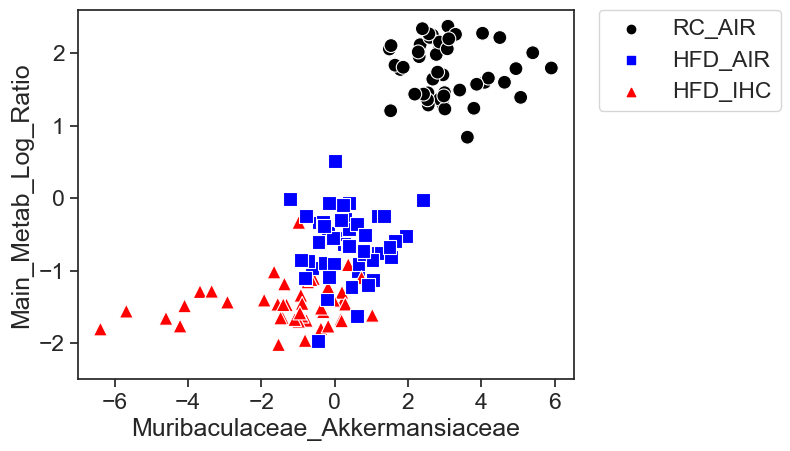

In [342]:
sns.scatterplot(data=micro_metab[micro_metab['host_age']!=10], 
                x='Muribaculaceae_Akkermansiaceae', y='Main_Metab_Log_Ratio',
               hue='diet_exp', hue_order=['RC_AIR', 'HFD_AIR', 'HFD_IHC'], palette=['black', 'blue', 'red'], 
                style='diet_exp', markers=['o','^','s'], s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(-2.5, 2.6)
new_rc_params = {'text.usetex': False, "svg.fonttype": 'none'}
plt.rcParams.update(new_rc_params)
plt.savefig('../figures/jointRPCA_micro-metab_both-lrs_scatterplot_hostage10plus.svg', dpi=300, bbox_inches = "tight")

In [334]:
from scipy.stats import pearsonr

In [335]:
micro_metab.shape

(174, 55)

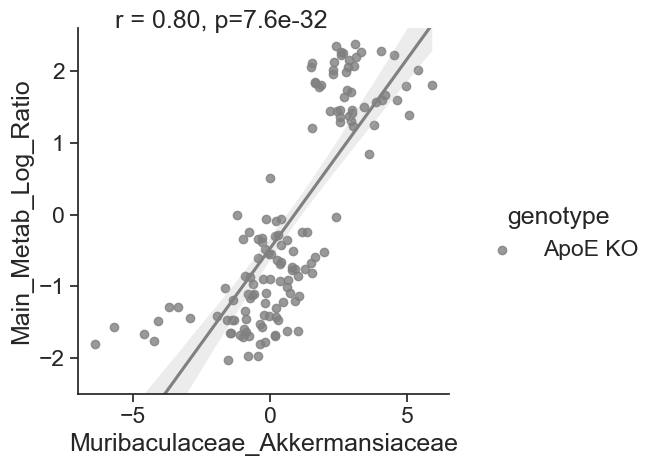

In [339]:
micro_metab_late = micro_metab[micro_metab['host_age']!=10].copy()
micro_metab_late_nns = micro_metab_late.dropna(subset=['Muribaculaceae_Akkermansiaceae', 'Main_Metab_Log_Ratio'])

g = sns.lmplot(data=micro_metab_late_nns, 
               x='Muribaculaceae_Akkermansiaceae', 
           y='Main_Metab_Log_Ratio', hue='genotype', palette=['grey'])

def annotate(data, **kws):
    r, p = pearsonr(micro_metab_late_nns['Muribaculaceae_Akkermansiaceae'], 
                   micro_metab_late_nns['Main_Metab_Log_Ratio'])
    ax = plt.gca()
    ax.text(.1, 0.999, 'r = {:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)

plt.ylim(-2.5, 2.6)

new_rc_params = {'text.usetex': False, "svg.fonttype": 'none'}
plt.rcParams.update(new_rc_params)
plt.savefig('../figures/jointRPCA_micro-metab_both-lrs_lmplot_hostage10plus.svg', dpi=300, bbox_inches = "tight")

# Stats for the groups - no easy way to do 2D array

In [340]:
micro_metab_late_nns.shape

(138, 55)

In [363]:
from scipy import stats

In [379]:
mm_slice = micro_metab[['Muribaculaceae_Akkermansiaceae', 'Main_Metab_Log_Ratio', 'diet_exp']].copy()
mm_slice

Muribaculaceae_Akkermansiaceae  Main_Metab_Log_Ratio  \
11548.A17.93.20                         1.648187              1.838825   
11548.A15.86.1                          2.226999              0.795269   
11548.A16.90.5                          2.303591              1.951278   
11548.A16.91.5                          2.329422              2.116096   
11548.A15.85.1                          4.230814              2.070149   
...                                          ...                   ...   
11548.A23.117.5                         0.601079             -1.623458   
11548.A23.118.5                         1.037296             -1.133911   
11548.A23.119.20                       -0.163967             -0.067447   
11548.A23.120.20                        0.832780             -0.511495   
11548.A23.119.5                         0.916011             -1.200129   

                 diet_exp  
11548.A17.93.20    RC_AIR  
11548.A15.86.1     RC_AIR  
11548.A16.90.5     RC_AIR  
11548.A16.91.5     RC_AIR  
11548.A15.85.1     RC_AIR  
...                   ...  
11548.A23.117.5   HFD_AIR  
11548.A23.118.5   HFD_AIR  
11548.A23.119.20  HFD_AIR  
11548.A23.120.20  HFD_AIR  
11548.A23.119.5   HFD_AIR  

[174 rows x 3 columns]

In [365]:
res = stats.linregress(micro_metab['Muribaculaceae_Akkermansiaceae'].values, 
                                   micro_metab['Main_Metab_Log_Ratio'].values)
res

LinregressResult(slope=0.5125904204607351, intercept=-0.42262232620333795, rvalue=0.8278579883887227, pvalue=4.761810826554654e-45, stderr=0.02648287195574551, intercept_stderr=0.07285119869247386)

In [359]:
rc_air = mm_slice[mm_slice['diet_exp']=='RC_AIR'].copy()
rc_air.drop(columns=['diet_exp'], inplace=True)

hfd_air = mm_slice[mm_slice['diet_exp']=='HFD_AIR'].copy()
hfd_air.drop(columns=['diet_exp'], inplace=True)

hfd_ihc = mm_slice[mm_slice['diet_exp']=='HFD_IHC'].copy()
hfd_ihc.drop(columns=['diet_exp'], inplace=True)

In [366]:
res = stats.linregress(rc_air['Muribaculaceae_Akkermansiaceae'].values, 
                                   rc_air['Main_Metab_Log_Ratio'].values)
res

LinregressResult(slope=-0.0379486713176356, intercept=1.8686021330286298, rvalue=-0.10973575353160943, pvalue=0.4080305204417718, stderr=0.04552817605254407, intercept_stderr=0.15146056859554025)

In [369]:
from sklearn.cluster import KMeans
import itertools

In [382]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter=999)
kmeans = kmeans.fit(mm_slice.drop(columns=['diet_exp']))
centroids = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

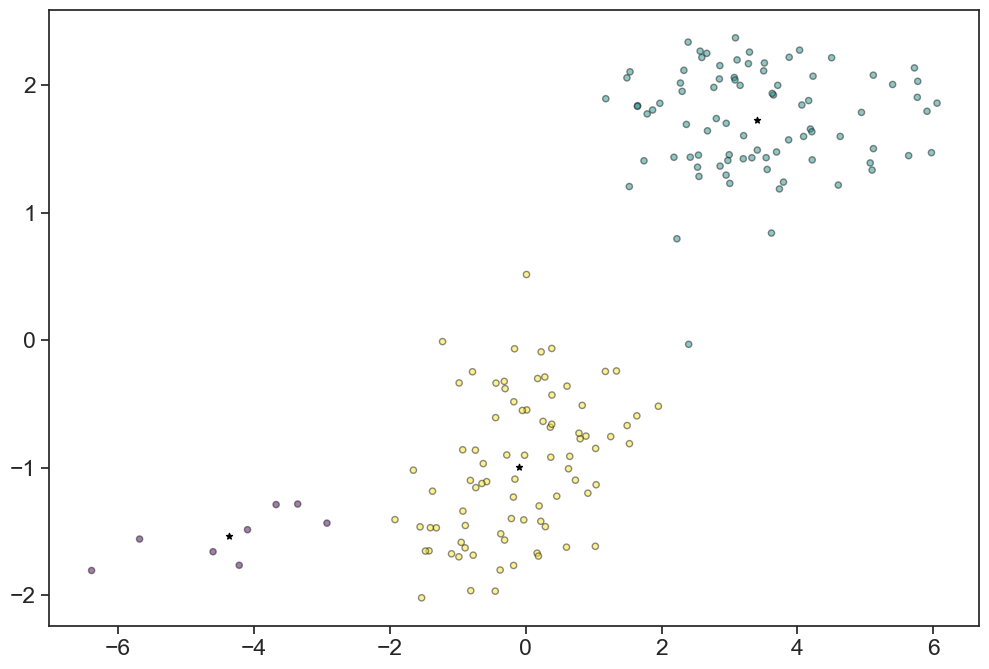

<Figure size 640x480 with 0 Axes>

In [384]:
for i in itertools.combinations(['Muribaculaceae_Akkermansiaceae', 'Main_Metab_Log_Ratio'], 2):
    fig, ax = plt.subplots(figsize=(12, 8))
    fig=plt.figure()
    ax.scatter(df[i[0]].values, df[i[1]].values, c=cluster_labels , cmap='viridis', edgecolor='k', s=20, alpha = 0.5)
    ax.scatter(centroids[:, 0], centroids[:, 1],s = 20, c = 'black', marker='*')
    plt.show()